# Energy Access and Electrification Planning in Kenya

### Introduction

The **Rural Electrification Programme** in Kenya aimed to achieve universal electricity access across the country, resulting in **76%** of Kenyan households gaining electricity access. This initiative significantly boosted rural economic resilience in Kenya. However, since its conclusion in 2022, the country has seen a notable decline in electricity access, particularly in generation capacity and reliability.

This project supports the World Bank's Mission 300, which aims to connect 300 million people in Sub-Saharan Africa to electricity by 2030. By leveraging data-driven insights, this project aims to guide energy planning and distribution in Kenya **to scale up connectivity** - a critical factor in addressing the country’s development needs.

### Problem Statement
Kenya’s population has been steadily increasing over the years. Notably, economic planning has not kept pace with this rapid growth.  As a result, an annual estimate of 4.4% rural-urban migration occurs, driven largely by youth seeking employment. However, this migration may not yield stable opportunities, as the Federation of Kenya Employers (FKE) reports a high youth unemployment rate of 67%.

To address the challenges posed by Kenya’s growing population, rising unemployment, and high rates of rural-to-urban migration, the government must implement strategic, long-term economic interventions. 

Prioritizing rural electrification and expanding energy access will stimulate local investments, promote the growth of small and medium-sized enterprises (SMEs), and enhance agricultural productivity through the adoption of advanced technologies. Most critically, fostering job creation within rural areas will drive sustained economic growth, increase household income, and build resilience within rural economie### s.


### Objective
This project utilizes geospatial data for Kenya to support strategic objectives in wind renewable energy planning.

**Classification and clustering algorithms** were applied to identify areas with sparse grid infrastructure and high population density, to highlight regions where wind farms and wind microgrids could be feasible solutions. 


**1. Data Extraction & Visualization: Kenya's Electricity Generation & Demand**

In [1]:
import pandas as pd
import warnings

warnings.filterwarnings('ignore')

In [2]:
generation_df = pd.read_csv('data/electricity_generation_data/electricity-generation.csv')
generation_df

,Entity,Code,Year,Electricity generation - TWh
0,ASEAN (Ember),NaN,2000,378.61
1,ASEAN (Ember),NaN,2001,404.85
2,ASEAN (Ember),NaN,2002,433.19
3,ASEAN (Ember),NaN,2003,458.24
4,ASEAN (Ember),NaN,2004,496.56
...,...,...,...,...
7407,Zimbabwe,ZWE,2018,9.44
7408,Zimbabwe,ZWE,2019,8.49
7409,Zimbabwe,ZWE,2020,6.71
7410,Zimbabwe,ZWE,2021,8.46


In [3]:
# Extract Kenya's electricity generation data from generation_df
kenya_generation_df = generation_df[generation_df['Entity'] == 'Kenya'].reset_index(drop=True)
kenya_generation_df.head()

,Entity,Code,Year,Electricity generation - TWh
0,Kenya,KEN,2000,4.31
1,Kenya,KEN,2001,4.81
2,Kenya,KEN,2002,5.15
3,Kenya,KEN,2003,5.48
4,Kenya,KEN,2004,6.16


In [4]:
demand_df = pd.read_csv('data/electricity_generation_data/electricity-demand.csv')
demand_df

,Entity,Code,Year,Electricity demand - TWh
0,ASEAN (Ember),NaN,2000,378.61
1,ASEAN (Ember),NaN,2001,404.85
2,ASEAN (Ember),NaN,2002,433.19
3,ASEAN (Ember),NaN,2003,458.24
4,ASEAN (Ember),NaN,2004,496.56
...,...,...,...,...
5858,Zimbabwe,ZWE,2018,10.46
5859,Zimbabwe,ZWE,2019,9.60
5860,Zimbabwe,ZWE,2020,8.69
5861,Zimbabwe,ZWE,2021,10.20


In [5]:
# Extract Kenya's electricity demand data from the demand_df
kenya_demand_df = demand_df[demand_df['Entity'] == 'Kenya'].reset_index(drop=True)
kenya_demand_df.head()

,Entity,Code,Year,Electricity demand - TWh
0,Kenya,KEN,2000,4.51
1,Kenya,KEN,2001,4.98
2,Kenya,KEN,2002,5.37
3,Kenya,KEN,2003,5.67
4,Kenya,KEN,2004,6.32


In [6]:
# Merge Kenya's electricity generation and demand data into a single dataframe
electricity_df = pd.merge(
    kenya_demand_df[['Year', 'Electricity demand - TWh']],
    kenya_generation_df[['Year', 'Electricity generation - TWh']],
    on='Year',
    how='inner'
)

electricity_df.head()

,Year,Electricity demand - TWh,Electricity generation - TWh
0,2000,4.51,4.31
1,2001,4.98,4.81
2,2002,5.37,5.15
3,2003,5.67,5.48
4,2004,6.32,6.16


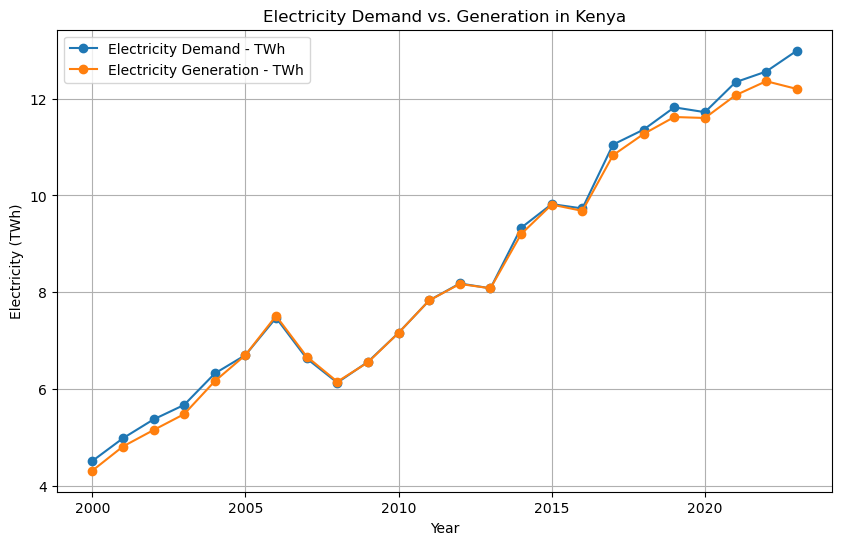

In [7]:
# Visualize Kenya's electricity demand and generation

import matplotlib.pyplot as plt

# Plotting the line graph
plt.figure(figsize=(10, 6))
plt.plot(electricity_df['Year'], electricity_df['Electricity demand - TWh'], label='Electricity Demand - TWh', marker='o')
plt.plot(electricity_df['Year'], electricity_df['Electricity generation - TWh'], label='Electricity Generation - TWh', marker='o')


plt.xlabel('Year')
plt.ylabel('Electricity (TWh)')
plt.title('Electricity Demand vs. Generation in Kenya')
plt.legend()
plt.grid(True)

plt.show()

**2. Data Extraction and Visualization: Renewable Potential**

In [8]:
import rasterio

file_path = 'data/renewable_potential_data/kenya_renewable_data/kenya_wind-speed_100m.tif'

# Open the .tif file using rasterio
with rasterio.open(file_path) as src:
    raster_data = src.read(1)  # Read the first band
    profile = src.profile     # Get metadata for the file

profile

{'driver': 'GTiff', 'dtype': 'float32', 'nodata': nan, 'width': 4149, 'height': 3806, 'count': 1, 'crs': CRS.from_wkt('GEOGCS["WGS 84",DATUM["World Geodetic System 1984",SPHEROID["WGS 84",6378137,298.257223563]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AXIS["Latitude",NORTH],AXIS["Longitude",EAST]]'), 'transform': Affine(0.002500000000000124, 0.0, 33.906572682195275,
       0.0, -0.002500000000000124, 4.623268747733392), 'blockxsize': 256, 'blockysize': 256, 'tiled': True, 'compress': 'deflate', 'interleave': 'band'}

In [9]:
import numpy as np
# Get NoData value from the metadata
nodata_value = profile.get('nodata', -9999)

# Find and count NoData values in the array
nodata_count = np.sum(raster_data == nodata_value)
print(f"NoData values count: {nodata_count}")

NoData values count: 0


In [10]:
# Open the TIFF file
with rasterio.open('data/renewable_potential_data/kenya_renewable_data/kenya_wind-speed_100m.tif') as src:
    # Print metadata
    print("Metadata:", src.meta)

    # Print dimensions (height and width) and number of bands
    print("Dimensions (Height x Width):", src.height, "x", src.width)
    print("Number of Bands:", src.count)

    # Print coordinate reference system (CRS)
    print("Coordinate Reference System (CRS):", src.crs)

    # Print affine transformation (mapping coordinates to array indices)
    print("Affine Transformation:", src.transform)

    # Read the first band and print a portion of pixel values as an example
    band1 = src.read(1)  # Read the first band
    print("Sample Pixel Values (Top-left corner):\n", band1[:5, :5])

Metadata: {'driver': 'GTiff', 'dtype': 'float32', 'nodata': nan, 'width': 4149, 'height': 3806, 'count': 1, 'crs': CRS.from_wkt('GEOGCS["WGS 84",DATUM["World Geodetic System 1984",SPHEROID["WGS 84",6378137,298.257223563]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AXIS["Latitude",NORTH],AXIS["Longitude",EAST]]'), 'transform': Affine(0.002500000000000124, 0.0, 33.906572682195275,
       0.0, -0.002500000000000124, 4.623268747733392)}
Dimensions (Height x Width): 3806 x 4149
Number of Bands: 1
Coordinate Reference System (CRS): GEOGCS["WGS 84",DATUM["World Geodetic System 1984",SPHEROID["WGS 84",6378137,298.257223563]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AXIS["Latitude",NORTH],AXIS["Longitude",EAST]]
Affine Transformation: | 0.00, 0.00, 33.91|
| 0.00,-0.00, 4.62|
| 0.00, 0.00, 1.00|
Sample Pixel Values (Top-left corner):
 [[nan nan nan nan nan]
 [nan nan nan nan nan]
 [nan nan nan nan nan]
 [nan nan nan na

In [11]:
# Check the no data value
no_data_value = src.nodata

# Create a mask for the no data values
masked_data = np.ma.masked_equal(raster_data, no_data_value)

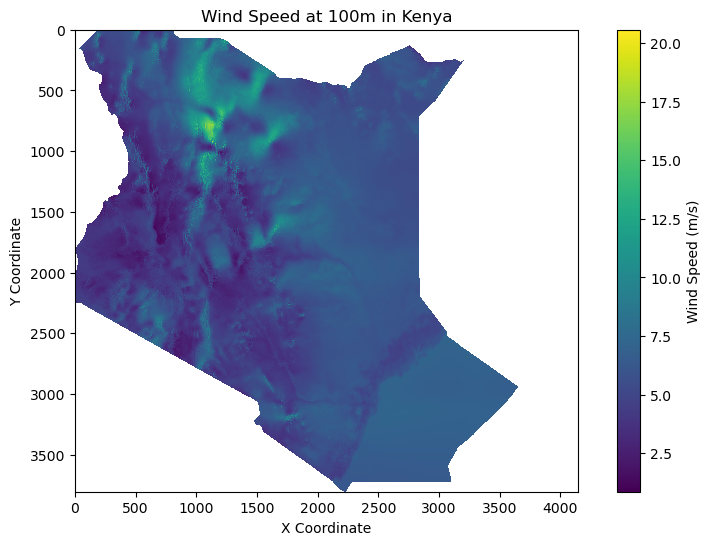

In [12]:
plt.figure(figsize=(10, 6))
plt.title('Wind Speed at 100m in Kenya')
plt.imshow(masked_data, cmap='viridis', interpolation='nearest')
plt.colorbar(label='Wind Speed (m/s)')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.grid(False)
plt.show()

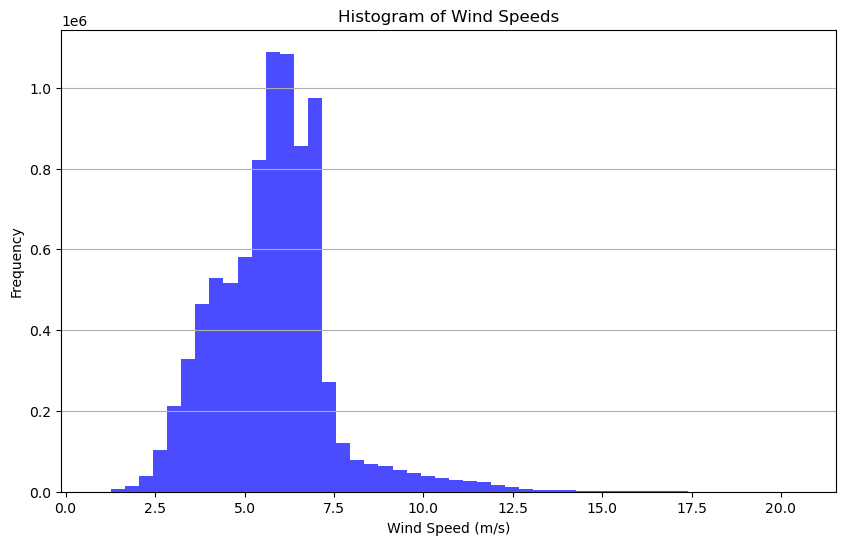

In [13]:
plt.figure(figsize=(10, 6))
plt.hist(masked_data.compressed(), bins=50, color='blue', alpha=0.7)
plt.title('Histogram of Wind Speeds')
plt.xlabel('Wind Speed (m/s)')
plt.ylabel('Frequency')
plt.grid(axis='y')
plt.show()

Identify areas with high average wind speeds, which may be potential sites for wind energy development:

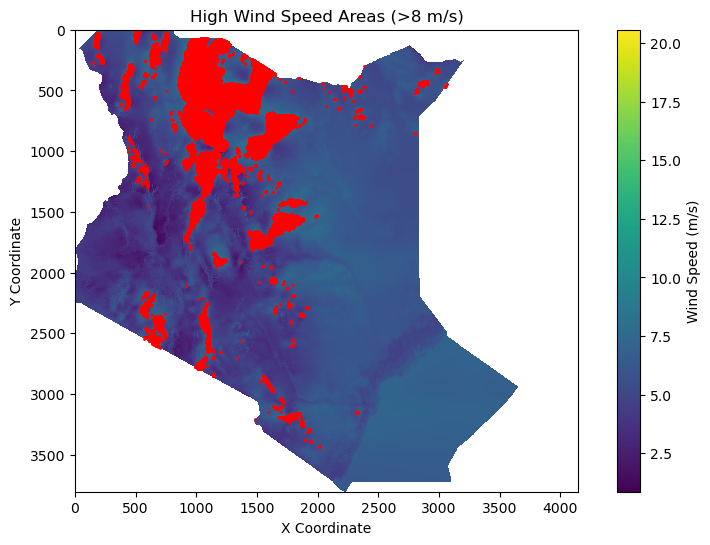

In [14]:
# Define a threshold for high wind speed
high_wind_threshold = 8  # m/s, adjust based on your criteria
high_wind_areas = np.where(masked_data > high_wind_threshold)

# Plot high wind areas
plt.figure(figsize=(10, 6))
plt.imshow(masked_data, cmap='viridis', interpolation='nearest')
plt.colorbar(label='Wind Speed (m/s)')
plt.scatter(high_wind_areas[1], high_wind_areas[0], color='red', s=1)  # s is the size of points
plt.title('High Wind Speed Areas (>8 m/s)')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.grid(False)
plt.show()

In [15]:
# Load the wind TIFF file
wind_speed = 'data/renewable_potential_data/kenya_renewable_data/kenya_wind-speed_100m.tif'

with rasterio.open(wind_speed) as src:
    # Read the wind speed data from the first band
    wind_data = src.read(1)
    transform = src.transform

# List to store latitude, longitude, and wind speed values
data = []

# Loop over each pixel
for row in range(wind_data.shape[0]):
    for col in range(wind_data.shape[1]):
        # Convert row, col to latitude, longitude
        lon, lat = rasterio.transform.xy(transform, row, col)
        wind_speed = wind_data[row, col]

        # Append to data list if wind speed is valid (not a nodata value)
        if not np.isnan(wind_speed):
            data.append({'Latitude': lat, 'Longitude': lon, 'Wind Speed': wind_speed})

wind_speed_df = pd.DataFrame(data)
print(wind_speed_df)

         Latitude  Longitude  Wind Speed
0        4.622019  35.915323    6.276936
1        4.622019  35.917823    6.260634
2        4.622019  35.920323    6.232945
3        4.622019  35.922823    6.241162
4        4.622019  35.925323    6.216225
...           ...        ...         ...
8538058 -4.887981  39.480323    6.142080
8538059 -4.890481  39.472823    6.143734
8538060 -4.890481  39.475323    6.142651
8538061 -4.890481  39.477823    6.141578
8538062 -4.890481  39.480323    6.140533

[8538063 rows x 3 columns]


**3. Data Extraction & Visualization: Kenya's Population Density**

In [16]:
import pandas as pd
import geopandas as gpd
from geopandas import GeoDataFrame
from shapely.geometry import LineString, Point
import rasterio as rio
import io
import shapely
import fiona

In [17]:
import geopandas as gpd
# Kenya's population density: 2000
pop_density2000 = gpd.read_file('data/pop_density_data/pop_density_data/2000.csv', engine='pyogrio')
pop_density2000 = pop_density2000.astype({
    'X':float,
    'Y':float,
    'Z':float})

# Kenya's population density: 2020
pop_density2020 = gpd.read_file('data/pop_density_data/pop_density_data/2020.csv', engine='pyogrio')
pop_density2020 = pop_density2020.astype({
    'X':float,
    'Y':float,
    'Z':float})


print('Kenyas Population Density: 2000', pop_density2000.head())

print('Kenyas Population Density: 2020', pop_density2020.head())


Kenyas Population Density: 2000            X         Y         Z
0  35.244583  5.462084  1.416720
1  35.252917  5.462084  1.413419
2  35.261250  5.462084  1.418887
3  35.269583  5.462084  1.457395
4  35.277917  5.462084  1.512301
Kenyas Population Density: 2020            X         Y          Z
0  35.244583  5.462084  52.668011
1  35.252917  5.462084  42.566807
2  35.261250  5.462084  39.304050
3  35.269583  5.462084  41.851067
4  35.277917  5.462084  38.238289


In [18]:
# 2000 Geometry
pop_density2000 = gpd.GeoDataFrame(
    pop_density2000, geometry=gpd.points_from_xy(pop_density2000.X, pop_density2000.Y), crs="EPSG:4326"
).drop(columns=['X','Y']).rename(columns={'Z':'Density'})

# 2020 Geometry
pop_density2020 = gpd.GeoDataFrame(
    pop_density2020, geometry=gpd.points_from_xy(pop_density2020.X, pop_density2020.Y), crs="EPSG:4326"
).drop(columns=['X','Y']).rename(columns={'Z':'Density'})


print('Kenyas Population Density Geometry: 2000', pop_density2020.head())
print('Kenyas Population Density Geometry: 2020', pop_density2000.head())

Kenyas Population Density Geometry: 2000      Density                  geometry
0  52.668011  POINT (35.24458 5.46208)
1  42.566807  POINT (35.25292 5.46208)
2  39.304050  POINT (35.26125 5.46208)
3  41.851067  POINT (35.26958 5.46208)
4  38.238289  POINT (35.27792 5.46208)
Kenyas Population Density Geometry: 2020     Density                  geometry
0  1.416720  POINT (35.24458 5.46208)
1  1.413419  POINT (35.25292 5.46208)
2  1.418887  POINT (35.26125 5.46208)
3  1.457395  POINT (35.26958 5.46208)
4  1.512301  POINT (35.27792 5.46208)


In [19]:
desc_pop_density2000 = pop_density2000.Density.describe(percentiles=[.95])
print('Kenyas Population Density Decription: 2000', desc_pop_density2000)

desc_pop_density2020 = pop_density2020.Density.describe(percentiles=[.95])
print('Kenyas Population Density Decription: 2020', desc_pop_density2020)

Kenyas Population Density Decription: 2000 count    680385.000000
mean         50.927232
std         320.932973
min           0.000000
50%           4.618363
95%         259.467688
max       73272.679688
Name: Density, dtype: float64
Kenyas Population Density Decription: 2020 count    680262.000000
mean         95.214693
std         661.822734
min           0.000000
50%          12.548709
95%         438.835638
max      167454.390625
Name: Density, dtype: float64


In [20]:
ke_counties = gpd.read_file('data/income_level_data/GSAP_AM24_2021.shp', engine='pyogrio',
                                   where="code='KEN'")

ke_counties.head()

,code,geo_year,geo_source,geo_level,geo_idvar,geo_id,geo_nvar,geo_name,geo_code,geometry
0,KEN,2022.0,GADM,1,GID_1,KEN.1_1,NAME_1,Baringo,KEN_2022_GADM1_KEN.1_1,"MULTIPOLYGON (((35.73880 -0.19544, 35.72428 -0..."
1,KEN,2022.0,GADM,1,GID_1,KEN.2_1,NAME_1,Bomet,KEN_2022_GADM1_KEN.2_1,"POLYGON ((35.26033 -1.01608, 35.26021 -1.01621..."
2,KEN,2022.0,GADM,1,GID_1,KEN.3_1,NAME_1,Bungoma,KEN_2022_GADM1_KEN.3_1,"POLYGON ((34.91305 0.85131, 34.91327 0.85148, ..."
3,KEN,2022.0,GADM,1,GID_1,KEN.4_1,NAME_1,Busia,KEN_2022_GADM1_KEN.4_1,"POLYGON ((34.02698 -0.01568, 34.02082 -0.02018..."
4,KEN,2022.0,GADM,1,GID_1,KEN.5_1,NAME_1,Elgeyo-Marakwet,KEN_2022_GADM1_KEN.5_1,"MULTIPOLYGON (((35.53068 0.22495, 35.53475 0.2..."


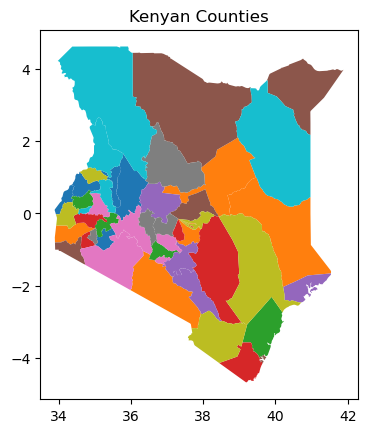

In [21]:
import matplotlib.pyplot as plt

ax = ke_counties.plot(column='geo_name')
ax.set_title("Kenyan Counties")
plt.show()

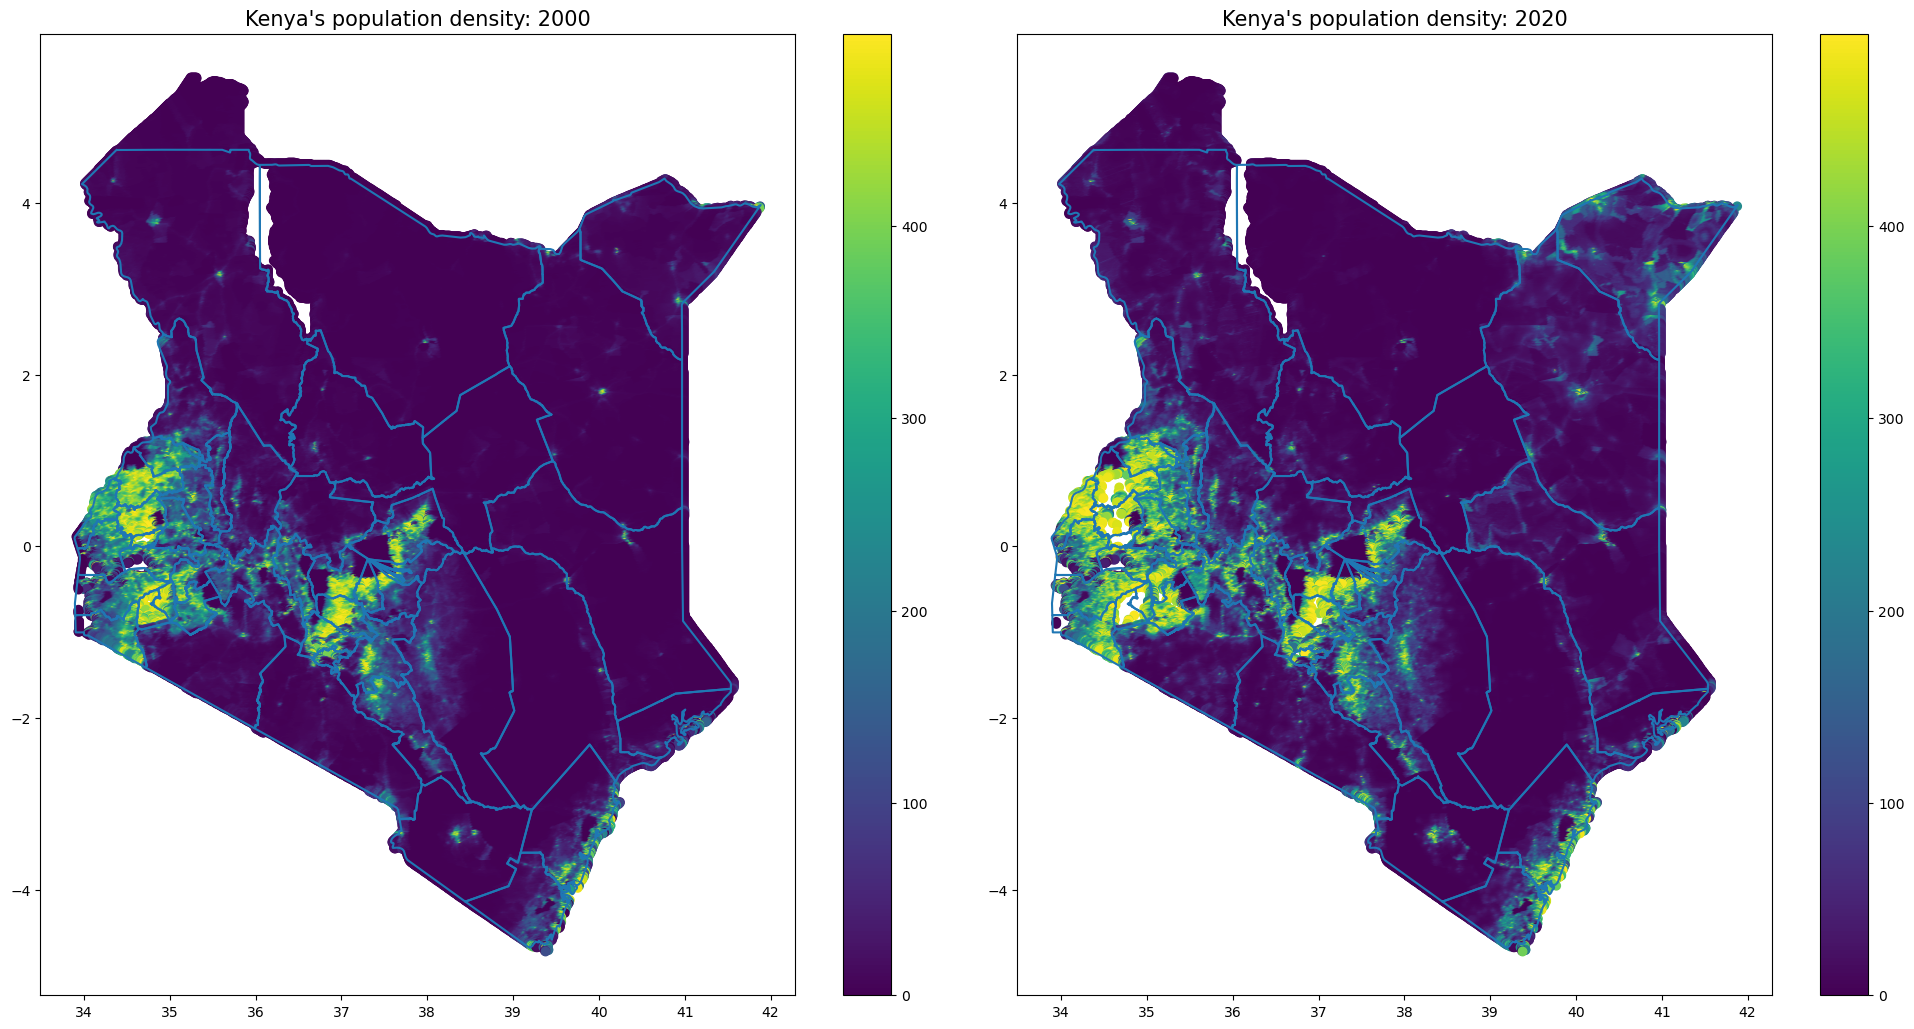

In [22]:
fig, axes = plt.subplots(1, 2, figsize=(20, 10))

# Kenya's population density: 2000
base1 = ke_counties.boundary.plot(ax=axes[0])
pop_density2000.query('Density < 500').plot(ax=base1, column='Density', legend=True)
axes[0].set_title("Kenya's population density: 2000", fontsize=15)

# Kenya's population density: 2020
base2 = ke_counties.boundary.plot(ax=axes[1])
pop_density2020.query('Density < 500').plot(ax=base2, column='Density', legend=True)
axes[1].set_title("Kenya's population density: 2020", fontsize=15)

plt.tight_layout()
plt.show()


In [23]:
import glob
import os

# Define the path to your CSV files
path = 'data/pop_density_data'
pop_files = glob.glob(path + "/*.csv")

# Initialize a list to hold each DataFrame
pop_dfs = []

# Loop over each file to process it
for file in pop_files:
    year = os.path.basename(file).split('.')[0]
    pop_df = pd.read_csv(file)
    pop_df = pop_df.rename(columns={'Z': year, 'X':'Latitude', 'Y':'Longitude'})

    # Append the DataFrame to the list
    pop_dfs.append(pop_df)

# Merge all DataFrames on 'X' and 'Y' columns
pop_density_df = pop_dfs[0]
for pop_df in pop_dfs[1:]:
    pop_density_df = pop_density_df.merge(pop_df, on=['Latitude', 'Longitude'], how='outer')

pop_density_df

,Latitude,Longitude,Kenya_pop_data
0,35.244583,5.462084,52.668011
1,35.252917,5.462084,42.566807
2,35.261250,5.462084,39.304050
3,35.269583,5.462084,41.851067
4,35.277917,5.462084,38.238289
...,...,...,...
680257,39.402917,-4.704583,166.426895
680258,39.411250,-4.704583,205.901260
680259,39.369583,-4.712916,0.000000
680260,39.377917,-4.712916,208.989548


In [24]:
pop_density_df.isna().sum()

Latitude          0
Longitude         0
Kenya_pop_data    0
dtype: int64

In [25]:
desc = pop_density_df.describe()

pop_density_df_median = pop_density_df.median()
pop_density_df_mode = pop_density_df.mode().iloc[0]

# Add median and mode to the summary statistics
desc.loc['median'] = pop_density_df_median
desc.loc['mode'] = pop_density_df_mode

desc

,Latitude,Longitude,Kenya_pop_data
count,680262.000000,680262.000000,680262.000000
mean,37.862412,0.573569,95.214693
std,1.913057,2.243334,661.822734
min,33.936250,-4.721250,0.000000
25%,36.261250,-1.179583,2.688723
50%,37.961250,0.545417,12.548709
75%,39.461250,2.437084,48.195143
max,41.877917,5.462084,167454.390625
median,37.961250,0.545417,12.548709
mode,39.219583,-1.004583,0.000000


In [26]:
# Fill na with the modal values
pop_density_df = pop_density_df.fillna(pop_density_df.mode().iloc[0])
pop_density_df.isna().sum()

Latitude          0
Longitude         0
Kenya_pop_data    0
dtype: int64

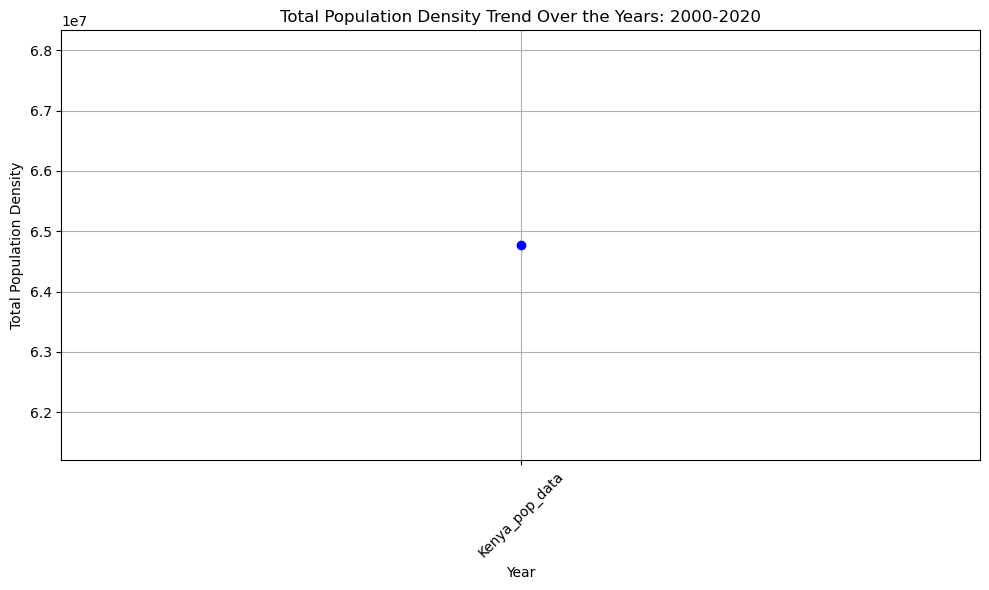

In [27]:
# Total population density per year
year_columns = pop_density_df.columns[2:]
annual_total_density = pop_density_df[year_columns].sum()

# Plot the trend
plt.figure(figsize=(10, 6))
plt.plot(annual_total_density.index, annual_total_density.values, marker='o', color='b')
plt.xlabel("Year")
plt.ylabel("Total Population Density")
plt.title("Total Population Density Trend Over the Years: 2000-2020")
plt.grid(True)
plt.xticks(ticks=annual_total_density.index[::2], rotation=45)

plt.tight_layout()
plt.show()

**4. Data Extraction & Visualization: Kenya's Income Level**

% of population living in households with consumption or income per person below the $2.15 poverty line.

In [28]:
import geopandas as gpd

shp_file_path = 'data/income_level_data/GSAP_AM24_2021.shp'
gdf = gpd.read_file(shp_file_path, engine='pyogrio')

print(gdf.shape)
gdf.head()

(1835, 10)


,code,geo_year,geo_source,geo_level,geo_idvar,geo_id,geo_nvar,geo_name,geo_code,geometry
0,ABW,NaN,None,None,None,None,None,Aruba (Neth.),ABW_2020_WB0,"POLYGON ((-69.99694 12.57758, -69.93639 12.531..."
1,AFG,NaN,None,None,None,None,None,Afghanistan,AFG_2020_WB0,"POLYGON ((74.54235 37.02167, 74.54742 37.01567..."
2,AGO,2015.0,GAUL,1,ADM1_CODE,398,ADM1_NAME,Bengo,AGO_2015_GAUL1_398,"POLYGON ((13.14401 -9.33313, 13.14405 -9.33316..."
3,AGO,2015.0,GAUL,1,ADM1_CODE,399,ADM1_NAME,Benguela,AGO_2015_GAUL1_399,"POLYGON ((13.79886 -11.77102, 13.79883 -11.771..."
4,AGO,2015.0,GAUL,1,ADM1_CODE,400,ADM1_NAME,Bie,AGO_2015_GAUL1_400,"POLYGON ((16.79741 -10.77021, 16.80907 -10.772..."


In [29]:
kenya_income_level = gdf[gdf['code'] == 'KEN']

print(kenya_income_level.shape)
kenya_income_level.head()

(47, 10)


,code,geo_year,geo_source,geo_level,geo_idvar,geo_id,geo_nvar,geo_name,geo_code,geometry
679,KEN,2022.0,GADM,1,GID_1,KEN.1_1,NAME_1,Baringo,KEN_2022_GADM1_KEN.1_1,"MULTIPOLYGON (((35.73880 -0.19544, 35.72428 -0..."
680,KEN,2022.0,GADM,1,GID_1,KEN.2_1,NAME_1,Bomet,KEN_2022_GADM1_KEN.2_1,"POLYGON ((35.26033 -1.01608, 35.26021 -1.01621..."
681,KEN,2022.0,GADM,1,GID_1,KEN.3_1,NAME_1,Bungoma,KEN_2022_GADM1_KEN.3_1,"POLYGON ((34.91305 0.85131, 34.91327 0.85148, ..."
682,KEN,2022.0,GADM,1,GID_1,KEN.4_1,NAME_1,Busia,KEN_2022_GADM1_KEN.4_1,"POLYGON ((34.02698 -0.01568, 34.02082 -0.02018..."
683,KEN,2022.0,GADM,1,GID_1,KEN.5_1,NAME_1,Elgeyo-Marakwet,KEN_2022_GADM1_KEN.5_1,"MULTIPOLYGON (((35.53068 0.22495, 35.53475 0.2..."


In [30]:
import pandas as pd
# Create an empty list to store the results
rows = []

# Iterate through each geometry and extract latitude and longitude
for index, row in kenya_income_level.iterrows():
    # Extract the geometry
    geom = row['geometry']

    # Handle MULTIPOLYGON or POLYGON types
    if geom.geom_type == 'MultiPolygon':
        for polygon in geom.geoms:  # Use geom.geoms to access individual polygons
            for coord in polygon.exterior.coords:
                rows.append({
                    'County': row['geo_name'],
                    'Latitude': coord[1],
                    'Longitude': coord[0]
                })
    elif geom.geom_type == 'Polygon':
        for coord in geom.exterior.coords:
            rows.append({
                'Latitude': coord[1],
                'Longitude': coord[0],
                'County': row['geo_name']
            })

kenya_income_level = pd.DataFrame(rows)
print(kenya_income_level.shape)
kenya_income_level

(274900, 3)


,County,Latitude,Longitude
0,Baringo,-0.195439,35.738800
1,Baringo,-0.198901,35.724277
2,Baringo,-0.195616,35.723232
3,Baringo,-0.195289,35.723129
4,Baringo,-0.194905,35.723007
...,...,...,...
274895,West Pokot,1.190623,35.422623
274896,West Pokot,1.189342,35.422203
274897,West Pokot,1.188469,35.422005
274898,West Pokot,1.187765,35.421890


In [31]:
print(kenya_income_level.County.nunique())
kenya_income_level.County.unique()

47


array(['Baringo', 'Bomet', 'Bungoma', 'Busia', 'Elgeyo-Marakwet', 'Embu',
       'Garissa', 'Homa Bay', 'Isiolo', 'Kajiado', 'Kakamega', 'Kericho',
       'Kiambu', 'Kilifi', 'Kirinyaga', 'Kisii', 'Kisumu', 'Kitui',
       'Kwale', 'Laikipia', 'Lamu', 'Machakos', 'Makueni', 'Mandera',
       'Marsabit', 'Meru', 'Migori', 'Mombasa', "Murang'a", 'Nairobi',
       'Nakuru', 'Nandi', 'Narok', 'Nyamira', 'Nyandarua', 'Nyeri',
       'Samburu', 'Siaya', 'Taita Taveta', 'Tana River', 'Tharaka-Nithi',
       'Trans Nzoia', 'Turkana', 'Uasin Gishu', 'Vihiga', 'Wajir',
       'West Pokot'], dtype=object)

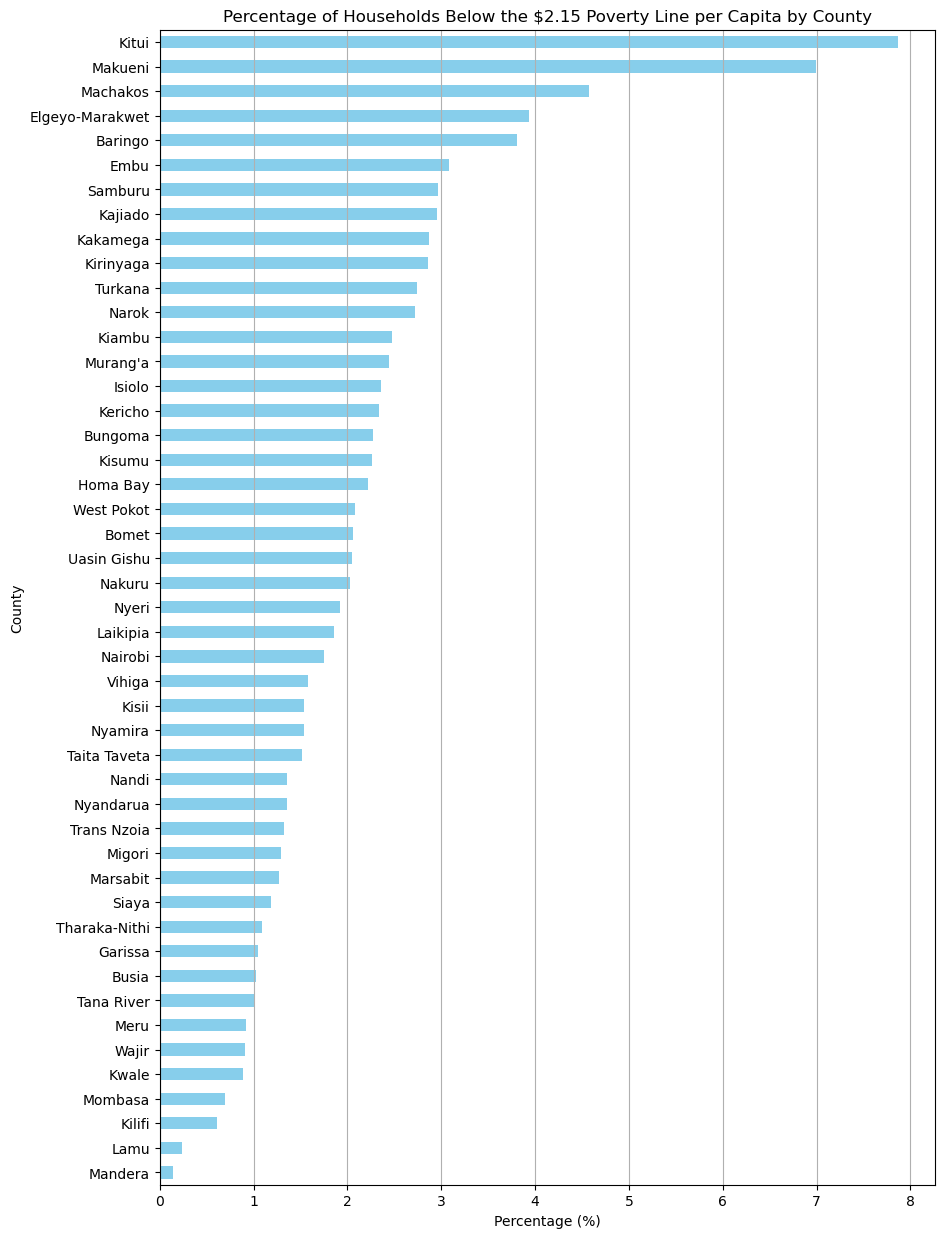

In [32]:
import matplotlib.pyplot as plt

# Count occurrences of each county
county_counts = kenya_income_level['County'].value_counts()

# Calculate the percentage of each county
county_percentage = (county_counts / county_counts.sum()) * 100
county_percentage = county_percentage.sort_values(ascending=True)

# Plotting the horizontal bar graph
plt.figure(figsize=(10, 15))
county_percentage.plot(kind='barh', color='skyblue')

# Adding titles and labels
plt.title('Percentage of Households Below the $2.15 Poverty Line per Capita by County')
plt.xlabel('Percentage (%)')
plt.ylabel('County')

# Show the plot
plt.grid(axis='x')
plt.show()

**5. Data Extraction & Visualization: Grid Infrustructure**

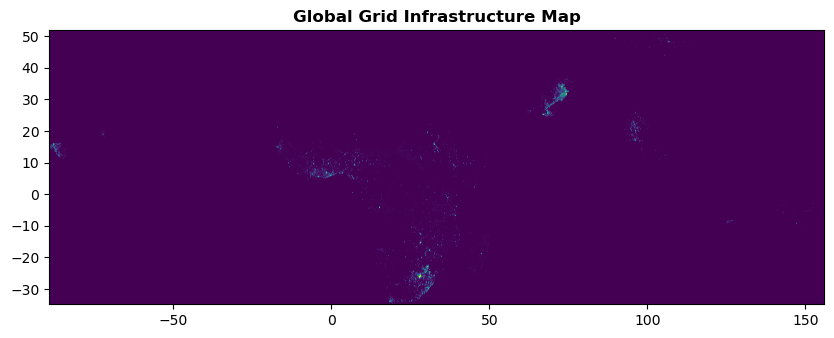

In [33]:
import geopandas as gpd
import rasterio
from rasterio.plot import show
import matplotlib.pyplot as plt
import numpy as np

# Open the .tif raster file
with rasterio.open('data/grid_infrustructure_data/global_data/global_1_1_1_1_1_0.tif') as src:

    data = src.read(1)

    # Histogram equalization for better contrast
    p2, p98 = np.percentile(data[data > 0], (2, 98))
    data = np.clip(data, p2, p98)


    fig, ax = plt.subplots(figsize=(10, 10))
    show(data, ax=ax, transform=src.transform, cmap="viridis", title="Global Grid Infrastructure Map")

plt.show()

In [34]:
import rasterio
import pandas as pd
from rasterio.transform import rowcol

# Path to the TIFF file
tiff_path = 'data/grid_infrustructure_data/global_data/global_1_1_1_1_1_0.tif'

# Open the TIFF file
with rasterio.open(tiff_path) as src:

    grid_array = src.read(1)
    transform = src.transform
    width, height = src.width, src.height

    # Lists to store the results
    latitudes = []
    longitudes = []
    grid_values = []

    # Loop through each pixel to get its coordinate and value
    for row in range(height):
        for col in range(width):
            # Get the grid value at the current pixel
            grid_value = grid_array[row, col]

            # Ignore nodata values
            if grid_value == src.nodata:
                continue

            # Convert row, col to latitude, longitude
            lon, lat = rasterio.transform.xy(transform, row, col, offset='center')

            # Append to lists
            latitudes.append(lat)
            longitudes.append(lon)
            grid_values.append(grid_value)

# Create a DataFrame
grid_df = pd.DataFrame({
    "Latitude": latitudes,
    "Longitude": longitudes,
    "GridValue": grid_values
})

grid_df


,Latitude,Longitude,GridValue
0,51.899252,99.259307,7
1,51.689252,99.309307,3
2,51.669252,99.319307,5
3,51.659252,100.529307,3
4,51.639252,100.859307,5
...,...,...,...
4235274,-34.820748,20.059307,98
4235275,-34.830748,19.999307,1
4235276,-34.830748,20.009307,1
4235277,-34.830748,20.019307,1


In [35]:
# Extract Kenya's coordinates
import pandas as pd

kenya_grid_df = grid_df[(grid_df['Latitude'] >= -4.7) & (grid_df['Latitude'] <= 5.1) &
              (grid_df['Longitude'] >= 33.5) & (grid_df['Longitude'] <= 41.9)]

print(kenya_grid_df.isna().sum())
kenya_grid_df


Latitude     0
Longitude    0
GridValue    0
dtype: int64


,Latitude,Longitude,GridValue
2410365,5.099252,33.529307,1
2410366,5.099252,33.539307,1
2410367,5.099252,36.089307,1
2410368,5.099252,36.389307,3
2410369,5.099252,36.469307,3
...,...,...,...
3023566,-4.690748,39.109307,1
3023567,-4.690748,39.129307,1
3023568,-4.690748,39.139307,3
3023569,-4.690748,39.149307,3


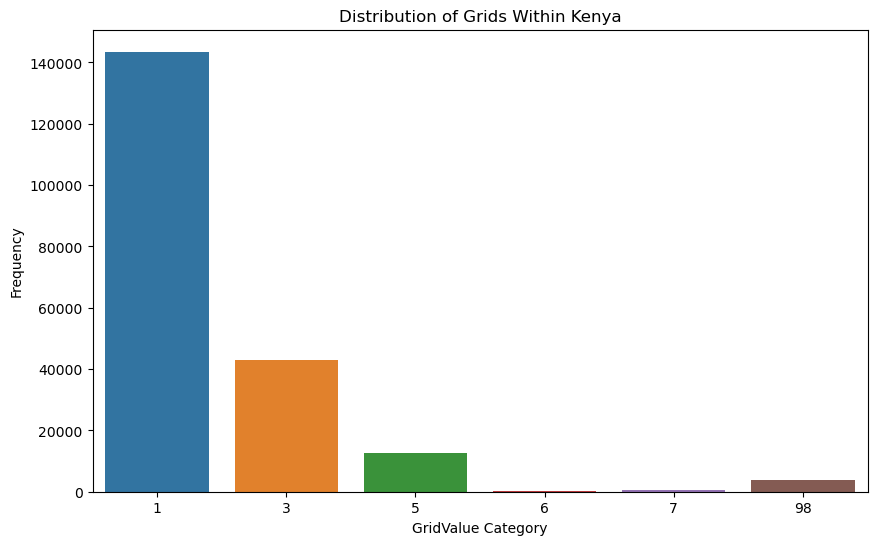

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.countplot(data=kenya_grid_df, x='GridValue')
plt.title("Distribution of Grids Within Kenya")
plt.xlabel("GridValue Category")
plt.ylabel("Frequency")
plt.show()


<Figure size 1200x800 with 0 Axes>

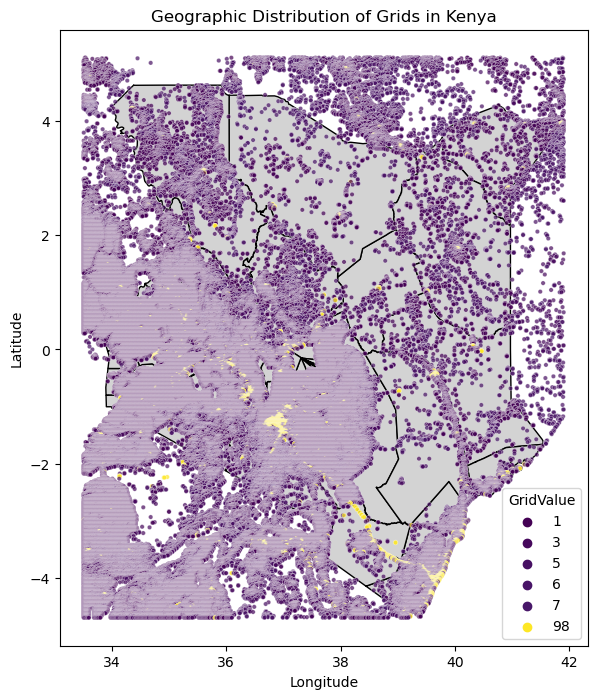

In [37]:
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns

kenya_shapefile = gpd.read_file('data/income_level_data/GSAP_AM24_2021.shp',
                                engine='pyogrio',
                                   where="code='KEN'")


# Scatter plot of grid values
plt.figure(figsize=(12, 8))

# Kenya boundary first on the background
ax = kenya_shapefile.plot(figsize=(12, 8), color='lightgrey', edgecolor='black')

# Plot the scatter plot of your grid values
sns.scatterplot(data=kenya_grid_df, x='Longitude', y='Latitude', hue='GridValue', palette='viridis', s=10, alpha=0.7, ax=ax)


plt.title("Geographic Distribution of Grids in Kenya")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.legend(title="GridValue")

plt.show()


**6. Datasets Merging**

In [38]:
# Electricity generation and demand df
print(electricity_df.shape)
electricity_df.head()

(24, 3)


,Year,Electricity demand - TWh,Electricity generation - TWh
0,2000,4.51,4.31
1,2001,4.98,4.81
2,2002,5.37,5.15
3,2003,5.67,5.48
4,2004,6.32,6.16


In [39]:
# Windspeed df
print(wind_speed_df.shape)
print(wind_speed_df.isna().sum())
wind_speed_df.head()

(8538063, 3)
Latitude      0
Longitude     0
Wind Speed    0
dtype: int64


,Latitude,Longitude,Wind Speed
0,4.622019,35.915323,6.276936
1,4.622019,35.917823,6.260634
2,4.622019,35.920323,6.232945
3,4.622019,35.922823,6.241162
4,4.622019,35.925323,6.216225


In [40]:
# Population density df
print(pop_density_df.shape)
print(pop_density_df.isna().sum())
pop_density_df.head()

(680262, 3)
Latitude          0
Longitude         0
Kenya_pop_data    0
dtype: int64


,Latitude,Longitude,Kenya_pop_data
0,35.244583,5.462084,52.668011
1,35.252917,5.462084,42.566807
2,35.261250,5.462084,39.304050
3,35.269583,5.462084,41.851067
4,35.277917,5.462084,38.238289


In [41]:
# Income level df
income_level_df = kenya_income_level

print(income_level_df.shape)
print(income_level_df.isna().sum())
income_level_df.head()

(274900, 3)
County       0
Latitude     0
Longitude    0
dtype: int64


,County,Latitude,Longitude
0,Baringo,-0.195439,35.738800
1,Baringo,-0.198901,35.724277
2,Baringo,-0.195616,35.723232
3,Baringo,-0.195289,35.723129
4,Baringo,-0.194905,35.723007


In [42]:
# Grid infrastructure df
kenya_grid_df = kenya_grid_df.reset_index(drop = True)

print(kenya_grid_df.shape)
print(kenya_grid_df.isna().sum())
kenya_grid_df.head()

(203255, 3)
Latitude     0
Longitude    0
GridValue    0
dtype: int64


,Latitude,Longitude,GridValue
0,5.099252,33.529307,1
1,5.099252,33.539307,1
2,5.099252,36.089307,1
3,5.099252,36.389307,3
4,5.099252,36.469307,3


In [43]:
# Merging population density and wind speed data
merged_df = pd.merge(pop_density_df, wind_speed_df, on=['Latitude', 'Longitude'], how='outer')
merged_df.head()

,Latitude,Longitude,Kenya_pop_data,Wind Speed
0,-4.890481,39.472823,NaN,6.143734
1,-4.890481,39.475323,NaN,6.142651
2,-4.890481,39.477823,NaN,6.141578
3,-4.890481,39.480323,NaN,6.140533
4,-4.887981,39.465323,NaN,6.152091


In [44]:
merged_df.shape

(9218325, 4)

In [45]:
# Adding grid infrastructure data
merged_df = pd.merge(merged_df, kenya_grid_df, on=['Latitude', 'Longitude'], how='outer')
print(merged_df.shape)
merged_df.head()

(9421580, 5)


,Latitude,Longitude,Kenya_pop_data,Wind Speed,GridValue
0,-4.890481,39.472823,NaN,6.143734,NaN
1,-4.890481,39.475323,NaN,6.142651,NaN
2,-4.890481,39.477823,NaN,6.141578,NaN
3,-4.890481,39.480323,NaN,6.140533,NaN
4,-4.887981,39.465323,NaN,6.152091,NaN


In [46]:
# Adding income level data by county
merged_df = pd.merge(merged_df, income_level_df, on=['Latitude', 'Longitude'], how='outer')

print(merged_df.shape)
print(merged_df.isna().sum())
merged_df.head()

(9696480, 6)
Latitude                0
Longitude               0
Kenya_pop_data    9016218
Wind Speed        1158417
GridValue         9493225
County            9421580
dtype: int64


,Latitude,Longitude,Kenya_pop_data,Wind Speed,GridValue,County
0,-4.890481,39.472823,NaN,6.143734,NaN,NaN
1,-4.890481,39.475323,NaN,6.142651,NaN,NaN
2,-4.890481,39.477823,NaN,6.141578,NaN,NaN
3,-4.890481,39.480323,NaN,6.140533,NaN,NaN
4,-4.887981,39.465323,NaN,6.152091,NaN,NaN


**7. Fill Null Values**

*a. Income Distribution*

In [47]:
merged_df = pd.read_csv('data/final_merged_df.csv')

In [48]:
from sklearn.neighbors import BallTree

# Extract latitude and longitude for both dataframes
merged_coords = merged_df[['Latitude', 'Longitude']]
income_coords = income_level_df[['Latitude', 'Longitude']]
income_values = income_level_df['County']

# Create the BallTree for the income_df coordinates
tree = BallTree(np.radians(income_coords), metric='haversine')

# Find nearest neighbors for rows with missing Income_Distribution
merged_coords_rad = np.radians(merged_coords) # Distance within a radius
distances, indices = tree.query(merged_coords_rad, k=1) # the nearest 1 neighbour

# Map nearest Income_Distribution values
nearest_income_values = income_values.iloc[indices.flatten()].values

# Fill na in the income sitribution column
merged_df['Income_Distribution'].fillna(pd.Series(nearest_income_values.flatten(), index=merged_df.index), inplace=True)
merged_df['Income_Distribution'].isna().sum()

0

*b. Grid Values*

In [49]:
from scipy.spatial import cKDTree

# Extract coordinates and grid values from the kenya_grid_df
grid_coords = kenya_grid_df[['Latitude', 'Longitude']].values
grid_values = kenya_grid_df['GridValue'].values

# Build KDTree using the grid coordinates
tree = cKDTree(grid_coords)

# Function to fill missing Grid_Value based on nearest neighbor
def fill_grid_value(row):
    if np.isnan(row['Grid_Value']):  # Only fill if Grid_Value is NaN
        # Find the nearest neighbor in kenya_grid_df
        _, idx = tree.query([row['Latitude'], row['Longitude']], k=1)
        return grid_values[idx]  # Use the GridValue of the nearest point
    return row['Grid_Value']  # Keep existing value if not NaN

# Apply the function to fill missing Grid_Value entries
merged_df['Grid_Value'] = merged_df.apply(fill_grid_value, axis=1)

merged_df['Grid_Value'].isna().sum()

0

In [50]:
merged_df.head()

,Latitude,Longitude,Pop_Density_2000,Pop_Density_2001,Pop_Density_2002,Pop_Density_2003,Pop_Density_2004,Pop_Density_2005,Pop_Density_2006,Pop_Density_2007,...,Pop_Density_2014,Pop_Density_2015,Pop_Density_2016,Pop_Density_2017,Pop_Density_2018,Pop_Density_2019,Pop_Density_2020,Wind_Speed,Grid_Value,Income_Distribution
0,35.244583,5.462084,1.416720,1.396852,1.624173,1.924415,2.429911,2.503574,3.391726,3.823526,...,17.609232,18.419613,21.129835,26.949865,35.308475,39.717140,52.668011,6.410498,1.0,Turkana
1,35.252917,5.462084,1.413419,1.372664,1.583961,1.867518,2.361063,2.378553,3.223956,3.587913,...,15.599761,15.981864,17.861954,23.140518,29.548529,32.403442,42.566807,6.410498,1.0,Turkana
2,35.261250,5.462084,1.418887,1.330445,1.540141,1.809350,2.250990,2.280811,3.042585,3.314642,...,14.218251,14.787646,16.177166,21.212101,26.670294,29.277493,39.304050,6.410498,1.0,Turkana
3,35.269583,5.462084,1.457395,1.385305,1.572818,1.860333,2.281828,2.322971,3.142808,3.381774,...,14.553508,15.171118,16.479475,22.152906,27.807093,30.655039,41.851067,6.410498,1.0,Turkana
4,35.277917,5.462084,1.512301,1.383120,1.565848,1.837749,2.219377,2.283923,3.029301,3.247593,...,13.881150,14.152464,15.410886,20.551128,25.901073,28.307270,38.238289,6.410498,1.0,Turkana


*c. Wind Speed*

In [51]:
import dask.dataframe as dd
import numpy as np
from scipy.spatial import cKDTree

# Convert the original DataFrame to a Dask DataFrame with appropriate partitioning
dask_df = dd.from_pandas(merged_df, npartitions=8)  # Adjust based on your system's memory and cores

# Select columns for imputing wind speed
lat_long_df = dask_df[['Latitude', 'Longitude', 'Wind_Speed']]

# Define the function to fill NaN values based on nearest neighbors
def impute_wind_speed_partition(partition):
    # Separate known and unknown wind speed entries
    known_wind = partition[~partition['Wind_Speed'].isna()]
    unknown_wind = partition[partition['Wind_Speed'].isna()]

    if unknown_wind.empty:
        # Return the partition as is if no NaN values are present
        return partition

    # Create KDTree with known wind speeds
    tree = cKDTree(known_wind[['Latitude', 'Longitude']].values)

    # Find nearest neighbors for each missing entry
    distances, indices = tree.query(unknown_wind[['Latitude', 'Longitude']].values, k=3)

    # Compute weighted mean to impute
    weights = 1 / (distances + 1e-5)  # Small constant to prevent division by zero
    imputed_values = np.sum(known_wind['Wind_Speed'].values[indices] * weights, axis=1) / weights.sum(axis=1)

    # Create a copy of the partition with imputed values
    partition_copy = partition.copy()
    partition_copy.loc[partition['Wind_Speed'].isna(), 'Wind_Speed'] = imputed_values

    return partition_copy

# Apply the imputation function across all partitions
imputed_partitions = dask_df.map_partitions(impute_wind_speed_partition)

# Compute the final DataFrame to get results
merged_df_imputed = imputed_partitions.compute()

# Verify that NaNs have been filled in 'Wind_Speed'
print("Remaining NaNs in 'Wind_Speed':", merged_df_imputed['Wind_Speed'].isna().sum())


Remaining NaNs in 'Wind_Speed': 0


In [52]:
merged_df_imputed['Wind_Speed'] = merged_df_imputed['Wind_Speed'].astype('float32')

merged_df['Wind_Speed'] = merged_df_imputed['Wind_Speed']

In [53]:
merged_df.head()

,Latitude,Longitude,Pop_Density_2000,Pop_Density_2001,Pop_Density_2002,Pop_Density_2003,Pop_Density_2004,Pop_Density_2005,Pop_Density_2006,Pop_Density_2007,...,Pop_Density_2014,Pop_Density_2015,Pop_Density_2016,Pop_Density_2017,Pop_Density_2018,Pop_Density_2019,Pop_Density_2020,Wind_Speed,Grid_Value,Income_Distribution
0,35.244583,5.462084,1.416720,1.396852,1.624173,1.924415,2.429911,2.503574,3.391726,3.823526,...,17.609232,18.419613,21.129835,26.949865,35.308475,39.717140,52.668011,6.410498,1.0,Turkana
1,35.252917,5.462084,1.413419,1.372664,1.583961,1.867518,2.361063,2.378553,3.223956,3.587913,...,15.599761,15.981864,17.861954,23.140518,29.548529,32.403442,42.566807,6.410498,1.0,Turkana
2,35.261250,5.462084,1.418887,1.330445,1.540141,1.809350,2.250990,2.280811,3.042585,3.314642,...,14.218251,14.787646,16.177166,21.212101,26.670294,29.277493,39.304050,6.410498,1.0,Turkana
3,35.269583,5.462084,1.457395,1.385305,1.572818,1.860333,2.281828,2.322971,3.142808,3.381774,...,14.553508,15.171118,16.479475,22.152906,27.807093,30.655039,41.851067,6.410498,1.0,Turkana
4,35.277917,5.462084,1.512301,1.383120,1.565848,1.837749,2.219377,2.283923,3.029301,3.247593,...,13.881150,14.152464,15.410886,20.551128,25.901073,28.307270,38.238289,6.410498,1.0,Turkana


In [54]:
merged_df.isna().sum()

Latitude               0
Longitude              0
Pop_Density_2000       0
Pop_Density_2001       0
Pop_Density_2002       0
Pop_Density_2003       0
Pop_Density_2004       0
Pop_Density_2005       0
Pop_Density_2006       0
Pop_Density_2007       0
Pop_Density_2008       0
Pop_Density_2009       0
Pop_Density_2010       0
Pop_Density_2011       0
Pop_Density_2012       0
Pop_Density_2013       0
Pop_Density_2014       0
Pop_Density_2015       0
Pop_Density_2016       0
Pop_Density_2017       0
Pop_Density_2018       0
Pop_Density_2019       0
Pop_Density_2020       0
Wind_Speed             0
Grid_Value             0
Income_Distribution    0
dtype: int64

*d. Population density*

In [55]:
# Identify rows with nulls in any Pop_Density column
pop_density_columns = [col for col in merged_df.columns if "Pop_Density" in col]
rows_with_null_pop_density = merged_df[pop_density_columns].isnull().any(axis=1)

# Identify rows where Latitude and Longitude do not match with income_level_df and kenya_grid_df
non_matching_coords = ~(
    (merged_df[['Latitude', 'Longitude']].isin(income_level_df[['Latitude', 'Longitude']].to_dict(orient='list')).all(axis=1)) |
    (merged_df[['Latitude', 'Longitude']].isin(kenya_grid_df[['Latitude', 'Longitude']].to_dict(orient='list')).all(axis=1))
)

# Step 3: Drop rows that have nulls in Pop_Density columns and non-matching coordinates
final_merged_df = merged_df[~(rows_with_null_pop_density & non_matching_coords)]

# Check result
final_merged_df.reset_index(drop=True, inplace=True)
final_merged_df.isna().sum()

Latitude               0
Longitude              0
Pop_Density_2000       0
Pop_Density_2001       0
Pop_Density_2002       0
Pop_Density_2003       0
Pop_Density_2004       0
Pop_Density_2005       0
Pop_Density_2006       0
Pop_Density_2007       0
Pop_Density_2008       0
Pop_Density_2009       0
Pop_Density_2010       0
Pop_Density_2011       0
Pop_Density_2012       0
Pop_Density_2013       0
Pop_Density_2014       0
Pop_Density_2015       0
Pop_Density_2016       0
Pop_Density_2017       0
Pop_Density_2018       0
Pop_Density_2019       0
Pop_Density_2020       0
Wind_Speed             0
Grid_Value             0
Income_Distribution    0
dtype: int64

In [56]:
final_merged_df.shape

(1158540, 26)

In [57]:
import pandas as pd
from sklearn.neighbors import KNeighborsRegressor
import numpy as np

# Define the columns that need filling
pop_density_columns = [col for col in final_merged_df.columns if "Pop_Density" in col]

# Iterate over each Pop_Density column
for col in pop_density_columns:
    # Separate data with and without nulls in the current column
    non_null_data = final_merged_df[final_merged_df[col].notnull()]
    null_data = final_merged_df[final_merged_df[col].isnull()]

    # Check if there are any nulls to fill
    if null_data.empty:
        continue  # Skip if no nulls in this column

    # Prepare feature matrix and target variable for the non-null data
    X_train = non_null_data[['Latitude', 'Longitude']]
    y_train = non_null_data[col]

    # Set up and train the KNeighborsRegressor model
    knn = KNeighborsRegressor(n_neighbors=5, weights='distance')
    knn.fit(X_train, y_train)

    # Predict missing values using the trained model
    X_null = null_data[['Latitude', 'Longitude']]
    predicted_values = knn.predict(X_null)

    # Fill in the missing values for the current Pop_Density column
    final_merged_df.loc[final_merged_df[col].isnull(), col] = predicted_values

# Display the remaining null values (if any)
final_merged_df.isna().sum()


Latitude               0
Longitude              0
Pop_Density_2000       0
Pop_Density_2001       0
Pop_Density_2002       0
Pop_Density_2003       0
Pop_Density_2004       0
Pop_Density_2005       0
Pop_Density_2006       0
Pop_Density_2007       0
Pop_Density_2008       0
Pop_Density_2009       0
Pop_Density_2010       0
Pop_Density_2011       0
Pop_Density_2012       0
Pop_Density_2013       0
Pop_Density_2014       0
Pop_Density_2015       0
Pop_Density_2016       0
Pop_Density_2017       0
Pop_Density_2018       0
Pop_Density_2019       0
Pop_Density_2020       0
Wind_Speed             0
Grid_Value             0
Income_Distribution    0
dtype: int64

In [58]:
final_merged_df.shape

(1158540, 26)

In [59]:
# final_merged_df.to_csv("final_merged_df.csv", index=False)

**7. Machine Learning**

In [60]:
import pandas as pd
import numpy as np
import warnings

warnings.filterwarnings('ignore')

**a. Clustering Algorithms**

**Objective 1:**

*Identify regions with sparse grid infrastructure and high population density where wind farms and microgrids could be feasible. This will be determined by analyzing population density projections, income distribution, and wind speed.*

**1. K-Means Clustering**

In [61]:
kmeans_df = pd.read_csv('data/final_merged_df.csv')

print(kmeans_df.shape)

(1158540, 26)


In [62]:
from sklearn.preprocessing import LabelEncoder

# Label encode categorical variables

# Income_Distribution
income_encoder = LabelEncoder()
kmeans_df['Income_Distribution'] = income_encoder.fit_transform(kmeans_df['Income_Distribution'])

# Grid_Value
grid_encoder = LabelEncoder()
kmeans_df['Grid_Value'] = grid_encoder.fit_transform(kmeans_df['Grid_Value'])

In [63]:
from sklearn.preprocessing import StandardScaler

# Normalize clustering features

# Clustering features
features = kmeans_df[['Pop_Density_2020', 'Wind_Speed', 'Latitude', 'Longitude', 'Income_Distribution', 'Grid_Value']]

scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

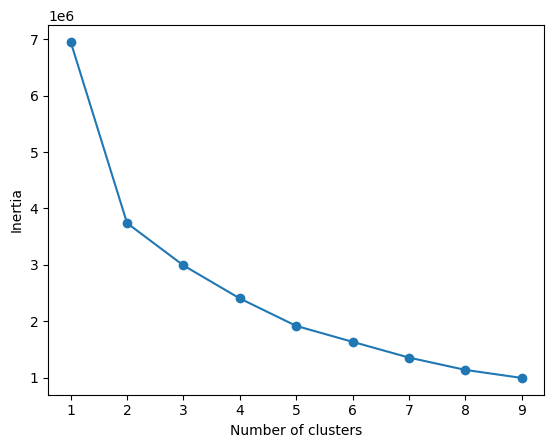

In [64]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Finding optimal number of clusters
inertia = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

# Plot elbow graph
plt.plot(range(1, 10), inertia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

From the above visualization, using 2 clusters is the optimal choice for segmenting regions based on grid infrastructure sparsity and wind microgrid feasibility.

In [65]:
# Fit with optimal number of clusters
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans_df['Cluster'] = kmeans.fit_predict(scaled_features)

kmeans_df[['Latitude', 'Longitude', 'Pop_Density_2020', 'Wind_Speed', 'Grid_Value', 'Income_Distribution', 'Cluster']]
kmeans_df.head()

,Latitude,Longitude,Pop_Density_2000,Pop_Density_2001,Pop_Density_2002,Pop_Density_2003,Pop_Density_2004,Pop_Density_2005,Pop_Density_2006,Pop_Density_2007,...,Pop_Density_2015,Pop_Density_2016,Pop_Density_2017,Pop_Density_2018,Pop_Density_2019,Pop_Density_2020,Wind_Speed,Grid_Value,Income_Distribution,Cluster
0,35.244583,5.462084,1.416720,1.396852,1.624173,1.924415,2.429911,2.503574,3.391726,3.823526,...,18.419613,21.129835,26.949865,35.308475,39.717140,52.668011,6.410498,0,42,0
1,35.252917,5.462084,1.413419,1.372664,1.583961,1.867518,2.361063,2.378553,3.223956,3.587913,...,15.981864,17.861954,23.140518,29.548529,32.403442,42.566807,6.410498,0,42,0
2,35.261250,5.462084,1.418887,1.330445,1.540141,1.809350,2.250990,2.280811,3.042585,3.314642,...,14.787646,16.177166,21.212101,26.670294,29.277493,39.304050,6.410498,0,42,0
3,35.269583,5.462084,1.457395,1.385305,1.572818,1.860333,2.281828,2.322971,3.142808,3.381774,...,15.171118,16.479475,22.152906,27.807093,30.655039,41.851067,6.410498,0,42,0
4,35.277917,5.462084,1.512301,1.383120,1.565848,1.837749,2.219377,2.283923,3.029301,3.247593,...,14.152464,15.410886,20.551128,25.901073,28.307270,38.238289,6.410498,0,42,0


In [66]:
# Group by the cluster and calculate the mean of each feature
cluster_summary = kmeans_df.groupby('Cluster')[['Pop_Density_2020', 'Wind_Speed', 'Grid_Value', 'Income_Distribution']].mean()

# Print cluster summary
print(cluster_summary)

         Pop_Density_2020  Wind_Speed  Grid_Value  Income_Distribution
Cluster                                                               
0               95.189845    6.136823    0.000096            41.998844
1               94.168520    5.803629    0.552448            21.064718


**Explore cluster characteristics**

**Findings**

1. *Cluster 0*

* The areas in cluster 0 are **relatively densely populated** with approximately 95.19 people per square kilometers.

* The wind conditions in this cluster are slightly stronger than in Cluster 1, with an average speed of 6.14 m/s at 100 meters above ground level. Therefore, these regions are suitable for both **wind farms and wind microgrids**.

* The grid infrastructure in Cluster 0 is significantly limited, with a value of 0.000096. Given the region's population density, there is clearly **high demand for electricity but limited transmission capacity**.

* The average income distribution of Cluster 0 is 41.999, indicating that approximately **50% of the population lives below the $2.15 poverty line**. Therefore, this cluster has a higher proportion of people living in poverty.


2. *Cluster 1*

* Compared to Cluster 0, the regions in Cluster 1 have a **slightly lower population density** of 94.17 people per square kilometer.

* Wind conditions in Cluster 1 are **generally calmer**, with an average wind speed of 5.80 m/s at 100 meters above ground level.

* Cluster 1 has a **higher presence of grid structures**, with a grid value of 0.5524, indicating that these regions are likely more developed compared to those in Cluster 0 and have higher access to electricity/energy.

* The average income distribution in Cluster 1 is 21.06, indicating that **only 21.06% of the population in these regions lives below the $2.15 poverty line**.

In [67]:
from sklearn.metrics import davies_bouldin_score

kmeans_df['Cluster'] = kmeans.labels_
db_score = davies_bouldin_score(scaled_features, kmeans.labels_)
print(f"Davies-Bouldin Index: {db_score}")

Davies-Bouldin Index: 0.7331502252301082


A **Davies-Bouldin Index of 0.73315** indicates that the clusters are relatively compact and distinct.

In [68]:
from sklearn.metrics import calinski_harabasz_score

kmeans_df['Cluster'] = kmeans.labels_
calinski_score = calinski_harabasz_score(scaled_features, kmeans.labels_)
print(f"Calinski-Harabasz Score: {calinski_score}")

Calinski-Harabasz Score: 995263.1557610929


A **Calinski-Harabasz Score of 995263.1557610929** data points in each cluster are tightly grouped together, and the clusters themselves are well-separated. 

Conclusively, this model has successfully created meaningful clusters with a significant difference between them.

In [80]:
kmeans_df.to_csv('kmeans.csv', index=False)

**2. hdbscan**

In [69]:
import pandas as pd
hdbscan_df = pd.read_csv('data/final_merged_df.csv')
hdbscan_df.head()

,Latitude,Longitude,Pop_Density_2000,Pop_Density_2001,Pop_Density_2002,Pop_Density_2003,Pop_Density_2004,Pop_Density_2005,Pop_Density_2006,Pop_Density_2007,...,Pop_Density_2014,Pop_Density_2015,Pop_Density_2016,Pop_Density_2017,Pop_Density_2018,Pop_Density_2019,Pop_Density_2020,Wind_Speed,Grid_Value,Income_Distribution
0,35.244583,5.462084,1.416720,1.396852,1.624173,1.924415,2.429911,2.503574,3.391726,3.823526,...,17.609232,18.419613,21.129835,26.949865,35.308475,39.717140,52.668011,6.410498,1.0,Turkana
1,35.252917,5.462084,1.413419,1.372664,1.583961,1.867518,2.361063,2.378553,3.223956,3.587913,...,15.599761,15.981864,17.861954,23.140518,29.548529,32.403442,42.566807,6.410498,1.0,Turkana
2,35.261250,5.462084,1.418887,1.330445,1.540141,1.809350,2.250990,2.280811,3.042585,3.314642,...,14.218251,14.787646,16.177166,21.212101,26.670294,29.277493,39.304050,6.410498,1.0,Turkana
3,35.269583,5.462084,1.457395,1.385305,1.572818,1.860333,2.281828,2.322971,3.142808,3.381774,...,14.553508,15.171118,16.479475,22.152906,27.807093,30.655039,41.851067,6.410498,1.0,Turkana
4,35.277917,5.462084,1.512301,1.383120,1.565848,1.837749,2.219377,2.283923,3.029301,3.247593,...,13.881150,14.152464,15.410886,20.551128,25.901073,28.307270,38.238289,6.410498,1.0,Turkana


In [71]:
#  label encoding income_distribution column
label_encoder = LabelEncoder()

hdbscan_df['Income_Distribution_encoded'] = label_encoder.fit_transform(hdbscan_df['Income_Distribution'])
print(hdbscan_df[['Income_Distribution', 'Income_Distribution_encoded']].head())

  Income_Distribution  Income_Distribution_encoded
0             Turkana                           42
1             Turkana                           42
2             Turkana                           42
3             Turkana                           42
4             Turkana                           42


Select the relevant columns, including one-hot encoded income columns, for clustering.

In [78]:
clustering_data = hdbscan_df[['Pop_Density_2020', 'Wind_Speed', 'Latitude', 'Longitude', 'Grid_Value', 'Income_Distribution_encoded']]

Standardize the data to bring all features to a similar scale, ensuring they contribute equally to clustering.

In [79]:
hdbscan_df.head()

,Latitude,Longitude,Pop_Density_2000,Pop_Density_2001,Pop_Density_2002,Pop_Density_2003,Pop_Density_2004,Pop_Density_2005,Pop_Density_2006,Pop_Density_2007,...,Pop_Density_2015,Pop_Density_2016,Pop_Density_2017,Pop_Density_2018,Pop_Density_2019,Pop_Density_2020,Wind_Speed,Grid_Value,Income_Distribution,Income_Distribution_encoded
0,35.244583,5.462084,1.416720,1.396852,1.624173,1.924415,2.429911,2.503574,3.391726,3.823526,...,18.419613,21.129835,26.949865,35.308475,39.717140,52.668011,6.410498,1.0,Turkana,42
1,35.252917,5.462084,1.413419,1.372664,1.583961,1.867518,2.361063,2.378553,3.223956,3.587913,...,15.981864,17.861954,23.140518,29.548529,32.403442,42.566807,6.410498,1.0,Turkana,42
2,35.261250,5.462084,1.418887,1.330445,1.540141,1.809350,2.250990,2.280811,3.042585,3.314642,...,14.787646,16.177166,21.212101,26.670294,29.277493,39.304050,6.410498,1.0,Turkana,42
3,35.269583,5.462084,1.457395,1.385305,1.572818,1.860333,2.281828,2.322971,3.142808,3.381774,...,15.171118,16.479475,22.152906,27.807093,30.655039,41.851067,6.410498,1.0,Turkana,42
4,35.277917,5.462084,1.512301,1.383120,1.565848,1.837749,2.219377,2.283923,3.029301,3.247593,...,14.152464,15.410886,20.551128,25.901073,28.307270,38.238289,6.410498,1.0,Turkana,42


In [80]:
# Standardize the data to bring all features to a similar scale
scaler = StandardScaler()
clustering_data_scaled = scaler.fit_transform(clustering_data)

Apply PCA for Dimensionality Reduction. Reduce to 2 components for visualization and efficiency. This helps capture the primary data variance in fewer dimensions.

In [81]:
from sklearn.decomposition import PCA

# Apply PCA to reduce to a manageable number of components
pca = PCA(n_components=2)
clustering_data_reduced = pca.fit_transform(clustering_data_scaled)

Add PCA components back to the DataFrame for easier access during visualization and further analysis.

In [82]:
hdbscan_df['PCA_Component_1'] = clustering_data_reduced[:, 0]
hdbscan_df['PCA_Component_2'] = clustering_data_reduced[:, 1]

Initialize and fit the HDBSCAN model with chosen parameters, designed to identify natural clusters in the data.

In [83]:
import hdbscan

# HDBSCAN clustering with optimized parameters
hdbscan_clusterer = hdbscan.HDBSCAN(metric='manhattan', min_samples=10, min_cluster_size=50)
clusters = hdbscan_clusterer.fit_predict(clustering_data_reduced)
stability_scores = hdbscan_clusterer.probabilities_

In [84]:
# Add clusters and stability scores back to the original DataFrame
hdbscan_df['Cluster'] = clusters
hdbscan_df['Stability_Score'] = stability_scores

Calculate clustering metrics for evaluation, excluding noise points labeled as -1.

In [85]:
# Filter out noise points (-1 label in HDBSCAN) before calculating metrics
clustered_data = clustering_data_reduced[clusters != -1]
valid_clusters = clusters[clusters != -1]

In [86]:
if len(set(valid_clusters)) > 1:
    db_index = davies_bouldin_score(clustered_data, valid_clusters)
    ch_index = calinski_harabasz_score(clustered_data, valid_clusters)
    print("Davies-Bouldin Index:", db_index)
    print("Calinski-Harabasz Index:", ch_index)
else:
    print("Insufficient clusters for evaluation metrics")

# Print stability scores and cluster labels
print("Cluster Labels:", clusters)
print("Cluster Stability Scores:", stability_scores)

Davies-Bouldin Index: 0.7478548169282285
Calinski-Harabasz Index: 331519.20516841765
Cluster Labels: [ -1  -1  -1 ...  -1 353 353]
Cluster Stability Scores: [0.         0.         0.         ... 0.         0.97330465 0.97330465]


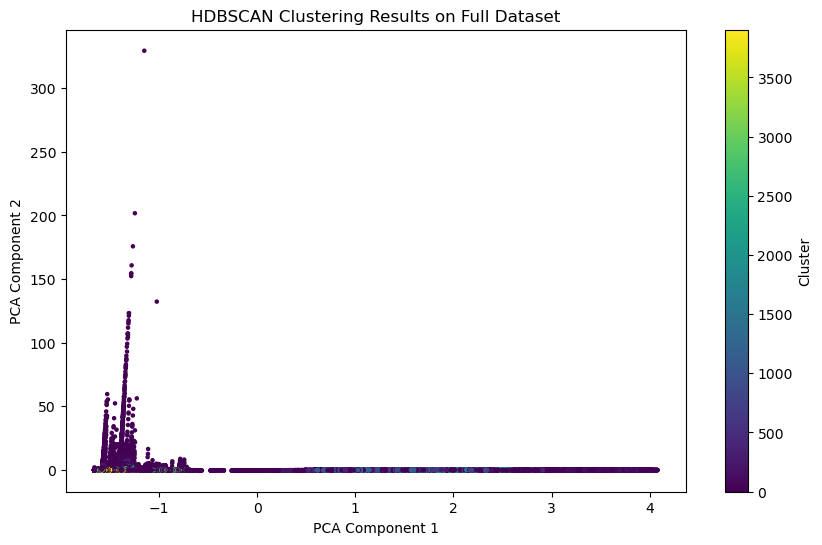

In [87]:
# Visualize clustering results
plt.figure(figsize=(10, 6))
plt.scatter(clustering_data_reduced[:, 0], clustering_data_reduced[:, 1], c=clusters, cmap='viridis', s=5)
plt.colorbar(label='Cluster')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('HDBSCAN Clustering Results on Full Dataset')
plt.show()

Fine-Tuning with Grid Search. Explore various combinations of HDBSCAN parameters to optimize clustering performance.

In [88]:
import itertools

# Hyperparameter Tuning with Grid Search
best_params = {}
best_db_index = float('inf')
min_cluster_sizes = [20, 50, 100]
min_samples_options = [5, 10, 20]
metrics = ['euclidean', 'manhattan']

In [89]:
for min_cluster_size, min_samples, metric in itertools.product(min_cluster_sizes, min_samples_options, metrics):
    hdbscan_clusterer = hdbscan.HDBSCAN(min_cluster_size=min_cluster_size, min_samples=min_samples, metric=metric)
    clusters = hdbscan_clusterer.fit_predict(clustering_data_reduced)
    clustered_data = clustering_data_reduced[clusters != -1]
    valid_clusters = clusters[clusters != -1]
    
    if len(set(valid_clusters)) > 1:
        db_index = davies_bouldin_score(clustered_data, valid_clusters)
        if db_index < best_db_index:
            best_db_index = db_index
            best_params = {'min_cluster_size': min_cluster_size, 'min_samples': min_samples, 'metric': metric}

print("Best Parameters:", best_params)

Best Parameters: {'min_cluster_size': 20, 'min_samples': 20, 'metric': 'euclidean'}


In [90]:
# Reapply HDBSCAN with Optimal Parameters
hdbscan_clusterer = hdbscan.HDBSCAN(**best_params)
clusters = hdbscan_clusterer.fit_predict(clustering_data_reduced)
stability_scores = hdbscan_clusterer.probabilities_

In [91]:
# Add clusters and stability scores to the DataFrame
hdbscan_df['Cluster'] = clusters
hdbscan_df['Stability_Score'] = stability_scores

In [92]:
# Filter out noise points for evaluation metrics
clustered_data = clustering_data_reduced[clusters != -1]
valid_clusters = clusters[clusters != -1]

In [93]:
# Calculate evaluation metrics if there are valid clusters
if len(set(valid_clusters)) > 1:
    db_index = davies_bouldin_score(clustered_data, valid_clusters)
    ch_index = calinski_harabasz_score(clustered_data, valid_clusters)
    print("Optimal Davies-Bouldin Index:", db_index)
    print("Optimal Calinski-Harabasz Index:", ch_index)
else:
    print("Insufficient clusters for evaluation metrics")

Optimal Davies-Bouldin Index: 0.5225197856978824
Optimal Calinski-Harabasz Index: 627627.7351279228


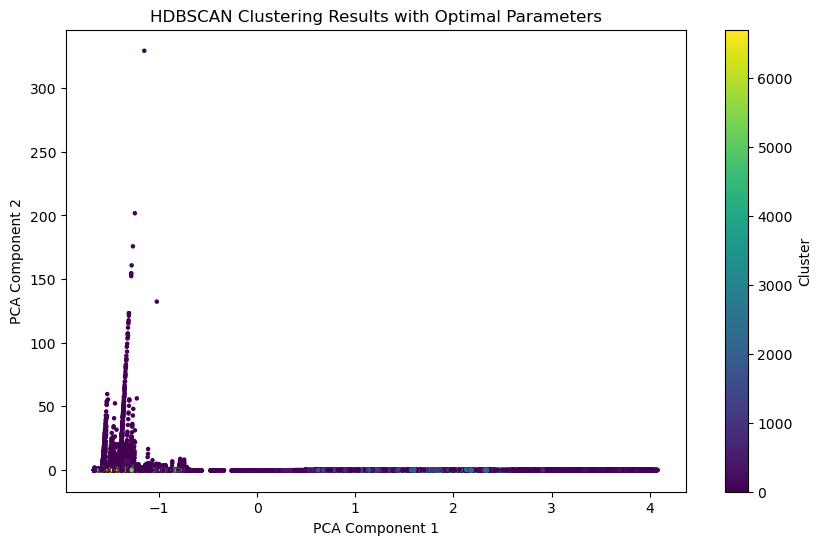

In [94]:
# Visualization of clustering results
plt.figure(figsize=(10, 6))
plt.scatter(hdbscan_df['PCA_Component_1'], hdbscan_df['PCA_Component_2'], c=clusters, cmap='viridis', s=5)
plt.colorbar(label='Cluster')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('HDBSCAN Clustering Results with Optimal Parameters')
plt.show()

**Findings**

* The visualization reveals distinct groupings of points based on the PCA-reduced data. Clusters appear compact and separated, which aligns with the favorable DBI score. This implies that the areas in the dataset are grouped into well-defined regions based on density.

* Some points are scattered and appear isolated from any cluster in the visualization, likely labeled as noise (-1). These noise points are considered outliers by HDBSCAN. In the context of our project (Energy Access and Electrification Planning in Kenya), these points might represent regions with atypical characteristics where extending the grid or establishing microgrids could be inefficient.

* Many clusters appear elongated or linear, which could imply correlations between features in the data. This linear structure indicates that certain features (e.g., population density, grid values) might be strongly correlated, influencing cluster shapes.
  
* There are visually distinct groups of clusters, which might represent different types of regions in terms of development or density.This separation could help in identifying areas that are more suitable for microgrids due to their density characteristics.
  
* HDBSCAN has grouped regions with similar density patterns. Clusters representing lower-density, geographically separated areas could be prime candidates for microgrid solutions, where extending a centralized power grid is less efficient. Here the microgrids might be more efficient.

***
The clusters identified by HDBSCAN help pinpoint regions where microgrids could be more feasible. Lower-density clusters with less connectivity to high-density regions suggest areas that may benefit from decentralized energy solutions.

The model labels some points as noise, indicating regions that are either too isolated or unique to fit into any cluster. These might require custom solutions, such as isolated power systems or further investigation to understand their unique characteristics.

In [95]:
import joblib

# Save the scaler, PCA, and HDBSCAN model
joblib.dump(scaler, 'scaler.pkl')
joblib.dump(pca, 'pca.pkl')
joblib.dump(hdbscan_clusterer, 'hdbscan_model.pkl')

['hdbscan_model.pkl']

**b. Classification Algorithms**

**Objectives 2:** *Classify areas based on their suitability for microgrid installation and map regions with high wind speeds to optimize the placement of wind farms and mini-grids in off-grid locations.*

**3. Random Forest**

In [96]:
rforest_df = kmeans_df.copy()
rforest_df.columns

Index(['Latitude', 'Longitude', 'Pop_Density_2000', 'Pop_Density_2001',
       'Pop_Density_2002', 'Pop_Density_2003', 'Pop_Density_2004',
       'Pop_Density_2005', 'Pop_Density_2006', 'Pop_Density_2007',
       'Pop_Density_2008', 'Pop_Density_2009', 'Pop_Density_2010',
       'Pop_Density_2011', 'Pop_Density_2012', 'Pop_Density_2013',
       'Pop_Density_2014', 'Pop_Density_2015', 'Pop_Density_2016',
       'Pop_Density_2017', 'Pop_Density_2018', 'Pop_Density_2019',
       'Pop_Density_2020', 'Wind_Speed', 'Grid_Value', 'Income_Distribution',
       'Cluster'],
      dtype='object')

In [97]:
# Categorical variables
from sklearn.preprocessing import LabelEncoder

# Income_Distribution: OHE to avoid imposing any ordinal relationships
rforest_df = pd.get_dummies(rforest_df, columns=['Income_Distribution'], drop_first=False, dtype=int)

# Grid_Value: Label Encoding since the grid values are discrete categories
label_encoder = LabelEncoder()
rforest_df['Grid_Value_Encoded'] = label_encoder.fit_transform(rforest_df['Grid_Value'])

rforest_df.head()

,Latitude,Longitude,Pop_Density_2000,Pop_Density_2001,Pop_Density_2002,Pop_Density_2003,Pop_Density_2004,Pop_Density_2005,Pop_Density_2006,Pop_Density_2007,...,Income_Distribution_38,Income_Distribution_39,Income_Distribution_40,Income_Distribution_41,Income_Distribution_42,Income_Distribution_43,Income_Distribution_44,Income_Distribution_45,Income_Distribution_46,Grid_Value_Encoded
0,35.244583,5.462084,1.416720,1.396852,1.624173,1.924415,2.429911,2.503574,3.391726,3.823526,...,0,0,0,0,1,0,0,0,0,0
1,35.252917,5.462084,1.413419,1.372664,1.583961,1.867518,2.361063,2.378553,3.223956,3.587913,...,0,0,0,0,1,0,0,0,0,0
2,35.261250,5.462084,1.418887,1.330445,1.540141,1.809350,2.250990,2.280811,3.042585,3.314642,...,0,0,0,0,1,0,0,0,0,0
3,35.269583,5.462084,1.457395,1.385305,1.572818,1.860333,2.281828,2.322971,3.142808,3.381774,...,0,0,0,0,1,0,0,0,0,0
4,35.277917,5.462084,1.512301,1.383120,1.565848,1.837749,2.219377,2.283923,3.029301,3.247593,...,0,0,0,0,1,0,0,0,0,0


In [98]:
# Label X and y

y = rforest_df['Cluster']
X = rforest_df.drop(columns= ['Cluster', 'Grid_Value'])

In [99]:
from sklearn.model_selection import train_test_split

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [100]:
from sklearn.preprocessing import StandardScaler

# Feature scaling
scaler = StandardScaler()

# Fit only on training data, then transform both training and test data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [101]:
from sklearn.ensemble import RandomForestClassifier

# Initialize and train the Random Forest model
model = RandomForestClassifier(class_weight="balanced", random_state=42)
model.fit(X_train_scaled, y_train)

RandomForestClassifier(class_weight='balanced', random_state=42)

In [102]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Predict on the test set
y_pred = model.predict(X_test_scaled)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")

# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Model Accuracy: 1.00
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    136369
           1       1.00      1.00      1.00     95339

    accuracy                           1.00    231708
   macro avg       1.00      1.00      1.00    231708
weighted avg       1.00      1.00      1.00    231708

Confusion Matrix:
[[136368      1]
 [     0  95339]]


In [103]:
from sklearn.model_selection import cross_val_score

# Initialize the Random Forest model with chosen parameters
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Perform 5-fold cross-validation
cv_scores = cross_val_score(rf_model, X, y, cv=5, scoring='accuracy')

# Cross-validation scores
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Accuracy:", np.mean(cv_scores))
print("Standard Deviation of CV Accuracy:", np.std(cv_scores))

Cross-Validation Scores: [0.98965077 1.         1.         1.         0.99937853]
Mean CV Accuracy: 0.9978058590985205
Standard Deviation of CV Accuracy: 0.004084643737973655


**4. XGBoost**

In [104]:
from xgboost import XGBClassifier

xgboost_df = kmeans_df.copy()
kmeans_df.columns

Index(['Latitude', 'Longitude', 'Pop_Density_2000', 'Pop_Density_2001',
       'Pop_Density_2002', 'Pop_Density_2003', 'Pop_Density_2004',
       'Pop_Density_2005', 'Pop_Density_2006', 'Pop_Density_2007',
       'Pop_Density_2008', 'Pop_Density_2009', 'Pop_Density_2010',
       'Pop_Density_2011', 'Pop_Density_2012', 'Pop_Density_2013',
       'Pop_Density_2014', 'Pop_Density_2015', 'Pop_Density_2016',
       'Pop_Density_2017', 'Pop_Density_2018', 'Pop_Density_2019',
       'Pop_Density_2020', 'Wind_Speed', 'Grid_Value', 'Income_Distribution',
       'Cluster'],
      dtype='object')

In [105]:
# Categorical variables
from sklearn.preprocessing import LabelEncoder

# Income_Distribution: OHE to avoid imposing any ordinal relationships
xgboost_df = pd.get_dummies(xgboost_df, columns=['Income_Distribution'], drop_first=False, dtype=int)

# Grid_Value: Label Encoding since the grid values are discrete categories
label_encoder = LabelEncoder()
xgboost_df['Grid_Value_Encoded'] = label_encoder.fit_transform(xgboost_df['Grid_Value'])

xgboost_df.head()

,Latitude,Longitude,Pop_Density_2000,Pop_Density_2001,Pop_Density_2002,Pop_Density_2003,Pop_Density_2004,Pop_Density_2005,Pop_Density_2006,Pop_Density_2007,...,Income_Distribution_38,Income_Distribution_39,Income_Distribution_40,Income_Distribution_41,Income_Distribution_42,Income_Distribution_43,Income_Distribution_44,Income_Distribution_45,Income_Distribution_46,Grid_Value_Encoded
0,35.244583,5.462084,1.416720,1.396852,1.624173,1.924415,2.429911,2.503574,3.391726,3.823526,...,0,0,0,0,1,0,0,0,0,0
1,35.252917,5.462084,1.413419,1.372664,1.583961,1.867518,2.361063,2.378553,3.223956,3.587913,...,0,0,0,0,1,0,0,0,0,0
2,35.261250,5.462084,1.418887,1.330445,1.540141,1.809350,2.250990,2.280811,3.042585,3.314642,...,0,0,0,0,1,0,0,0,0,0
3,35.269583,5.462084,1.457395,1.385305,1.572818,1.860333,2.281828,2.322971,3.142808,3.381774,...,0,0,0,0,1,0,0,0,0,0
4,35.277917,5.462084,1.512301,1.383120,1.565848,1.837749,2.219377,2.283923,3.029301,3.247593,...,0,0,0,0,1,0,0,0,0,0


In [106]:
# Label X and y
y = xgboost_df['Cluster']
X = xgboost_df.drop(columns= ['Cluster', 'Grid_Value'])

In [107]:
# Train_test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [108]:
from sklearn.preprocessing import MinMaxScaler

# Feature scaling
scaler = MinMaxScaler()

# Fit only on training data, then transform both training and test data
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [109]:
# Initialize and train the XGBoost Classifier
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

In [110]:
y_pred = xgb_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.9999
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    136106
           1       1.00      1.00      1.00     95602

    accuracy                           1.00    231708
   macro avg       1.00      1.00      1.00    231708
weighted avg       1.00      1.00      1.00    231708



### Multi-Layered Perception Model (MLP)

In [111]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Embedding, Flatten, Concatenate, Input
from tensorflow.keras.optimizers import Adam

In [112]:
print(hdbscan_df.columns)


Index(['Latitude', 'Longitude', 'Pop_Density_2000', 'Pop_Density_2001',
       'Pop_Density_2002', 'Pop_Density_2003', 'Pop_Density_2004',
       'Pop_Density_2005', 'Pop_Density_2006', 'Pop_Density_2007',
       'Pop_Density_2008', 'Pop_Density_2009', 'Pop_Density_2010',
       'Pop_Density_2011', 'Pop_Density_2012', 'Pop_Density_2013',
       'Pop_Density_2014', 'Pop_Density_2015', 'Pop_Density_2016',
       'Pop_Density_2017', 'Pop_Density_2018', 'Pop_Density_2019',
       'Pop_Density_2020', 'Wind_Speed', 'Grid_Value', 'Income_Distribution',
       'Income_Distribution_encoded', 'PCA_Component_1', 'PCA_Component_2',
       'Cluster', 'Stability_Score'],
      dtype='object')


In [113]:
# Create the 'Has_Electricity' column
hdbscan_df['Has_Electricity'] = hdbscan_df['Grid_Value'].apply(lambda x: 1 if x > 0.5 else 0)


In [114]:

# Verify the column
print(hdbscan_df[['Grid_Value', 'Has_Electricity']].head())
# Check the distribution of the new column
print(hdbscan_df['Has_Electricity'].value_counts())


   Grid_Value  Has_Electricity
0         1.0                1
1         1.0                1
2         1.0                1
3         1.0                1
4         1.0                1
Has_Electricity
1    1158540
Name: count, dtype: int64


In [128]:
# Apply Rule-Based Labeling for Energy Planning
hdbscan_df['Electrification_Label'] = hdbscan_df.apply(
    lambda row: 
        0 if row['Pop_Density_2020'] > 20 and row['Grid_Value'] > 0.5 else  # Grid extension likely
        1 if row['Pop_Density_2020'] < 20 and row['Wind_Speed'] > 5 else    # Wind microgrid likely
        2, axis=1  # Custom solutions or investigation
)

# Summary of Energy Planning Labels
print("Electrification Label Distribution:")
print(hdbscan_df['Electrification_Label'].value_counts())

Electrification Label Distribution:
Electrification_Label
0    751735
1    406805
Name: count, dtype: int64


In [129]:
# Define features for MLP model
numeric_features = [
    'Pop_Density_2020', 'Wind_Speed', 'Latitude', 'Longitude', 'Grid_Value',
    'Cluster', 'Stability_Score', 'Income_Distribution_encoded'
]

# Target variable
target_column = 'Has_Electricity'


In [130]:
hdbscan_df.head()

,Latitude,Longitude,Pop_Density_2000,Pop_Density_2001,Pop_Density_2002,Pop_Density_2003,Pop_Density_2004,Pop_Density_2005,Pop_Density_2006,Pop_Density_2007,...,Wind_Speed,Grid_Value,Income_Distribution,Income_Distribution_encoded,PCA_Component_1,PCA_Component_2,Cluster,Stability_Score,Has_Electricity,Electrification_Label
0,35.244583,5.462084,1.416720,1.396852,1.624173,1.924415,2.429911,2.503574,3.391726,3.823526,...,6.410498,1.0,Turkana,42,-1.242390,-0.104320,-1,0.0,1,0
1,35.252917,5.462084,1.413419,1.372664,1.583961,1.867518,2.361063,2.378553,3.223956,3.587913,...,6.410498,1.0,Turkana,42,-1.242656,-0.124208,-1,0.0,1,0
2,35.261250,5.462084,1.418887,1.330445,1.540141,1.809350,2.250990,2.280811,3.042585,3.314642,...,6.410498,1.0,Turkana,42,-1.242912,-0.130632,-1,0.0,1,0
3,35.269583,5.462084,1.457395,1.385305,1.572818,1.860333,2.281828,2.322971,3.142808,3.381774,...,6.410498,1.0,Turkana,42,-1.243159,-0.125618,-1,0.0,1,0
4,35.277917,5.462084,1.512301,1.383120,1.565848,1.837749,2.219377,2.283923,3.029301,3.247593,...,6.410498,1.0,Turkana,42,-1.243415,-0.132732,-1,0.0,1,0


In [131]:
# Prepare inputs
X_numeric = hdbscan_df[numeric_features]
X_county = hdbscan_df['Income_Distribution_encoded']  # Label-encoded Income_Distribution
y = hdbscan_df['Has_Electricity']


In [132]:
# Standardize numeric features
scaler = StandardScaler()
X_numeric_scaled = scaler.fit_transform(X_numeric)


In [133]:
# Define the MLP Model
# Numeric input
numeric_input = Input(shape=(len(numeric_features),))
# County embedding input
county_input = Input(shape=(1,))
county_embedding = Embedding(input_dim=hdbscan_df['Income_Distribution_encoded'].nunique(), output_dim=8)(county_input)
county_embedding = Flatten()(county_embedding)


In [134]:
# Concatenate all inputs
x = Concatenate()([numeric_input, county_embedding])
# Add dense layers
x = Dense(64, activation='relu')(x)
x = Dense(32, activation='relu')(x)
output = Dense(1, activation='sigmoid')(x)


In [135]:
# Compile and train the model
model = Model(inputs=[numeric_input, county_input], outputs=output)
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])


In [136]:
# Train the model
model.fit([X_numeric_scaled, X_county], y, epochs=10, batch_size=32, validation_split=0.2)


Epoch 1/10
28964/28964 ━━━━━━━━━━━━━━━━━━━━ 92s 3ms/step - accuracy: 1.0000 - loss: 0.0023 - val_accuracy: 1.0000 - val_loss: 5.3069e-09
Epoch 2/10
28964/28964 ━━━━━━━━━━━━━━━━━━━━ 102s 4ms/step - accuracy: 1.0000 - loss: 2.0887e-09 - val_accuracy: 1.0000 - val_loss: 3.5546e-09
Epoch 3/10
28964/28964 ━━━━━━━━━━━━━━━━━━━━ 83s 3ms/step - accuracy: 1.0000 - loss: 1.7341e-09 - val_accuracy: 1.0000 - val_loss: 3.2750e-09
Epoch 4/10
28964/28964 ━━━━━━━━━━━━━━━━━━━━ 81s 3ms/step - accuracy: 1.0000 - loss: 1.6448e-09 - val_accuracy: 1.0000 - val_loss: 3.0959e-09
Epoch 5/10
28964/28964 ━━━━━━━━━━━━━━━━━━━━ 90s 3ms/step - accuracy: 1.0000 - loss: 1.5768e-09 - val_accuracy: 1.0000 - val_loss: 2.9260e-09
Epoch 6/10
28964/28964 ━━━━━━━━━━━━━━━━━━━━ 135s 3ms/step - accuracy: 1.0000 - loss: 1.5215e-09 - val_accuracy: 1.0000 - val_loss: 2.8168e-09
Epoch 7/10
28964/28964 ━━━━━━━━━━━━━━━━━━━━ 80s 3ms/step - accuracy: 1.0000 - loss: 1.4846e-09 - val_accuracy: 1.0000 - val_loss: 2.7465e-09
Epoch 8/10
2896

#### County-Specific Analysis
Perform county-level analysis to identify areas needing electricity or suitable for microgrids.


In [137]:

# Identify counties with high need for electricity (based on electrification label)
counties_needing_electricity = hdbscan_df[hdbscan_df['Electrification_Label'] == 0].groupby('Income_Distribution_encoded').size()
print("Counties needing electricity:")
print(counties_needing_electricity)


Counties needing electricity:
Income_Distribution_encoded
0      15507
1       8020
2      14165
3      10661
4      13790
5      11684
6       4893
7       8471
8       8485
9      31348
10      9921
11      8346
12      9339
13      6339
14      9494
15      5671
16      8157
17     31939
18      7253
19      8560
20      1632
21     17706
22     23854
23      3505
24     10703
25      4259
26     18119
27      2182
28      8336
29      5639
30      9761
31      5880
32     32058
33      4840
34      5335
35      6454
36      9304
37      4781
38     14067
39      4194
40      5039
41      5632
42    289009
43      7331
44      4906
45      3598
46     11568
dtype: int64


In [138]:
# Identify counties suitable for wind microgrids
counties_wind_microgrid = hdbscan_df[hdbscan_df['Electrification_Label'] == 1].groupby('Income_Distribution_encoded').size()
print("Counties suitable for wind microgrids:")
print(counties_wind_microgrid)


Counties suitable for wind microgrids:
Income_Distribution_encoded
42    406805
dtype: int64


#### Visualization of Results by County


In [139]:
import matplotlib.pyplot as plt


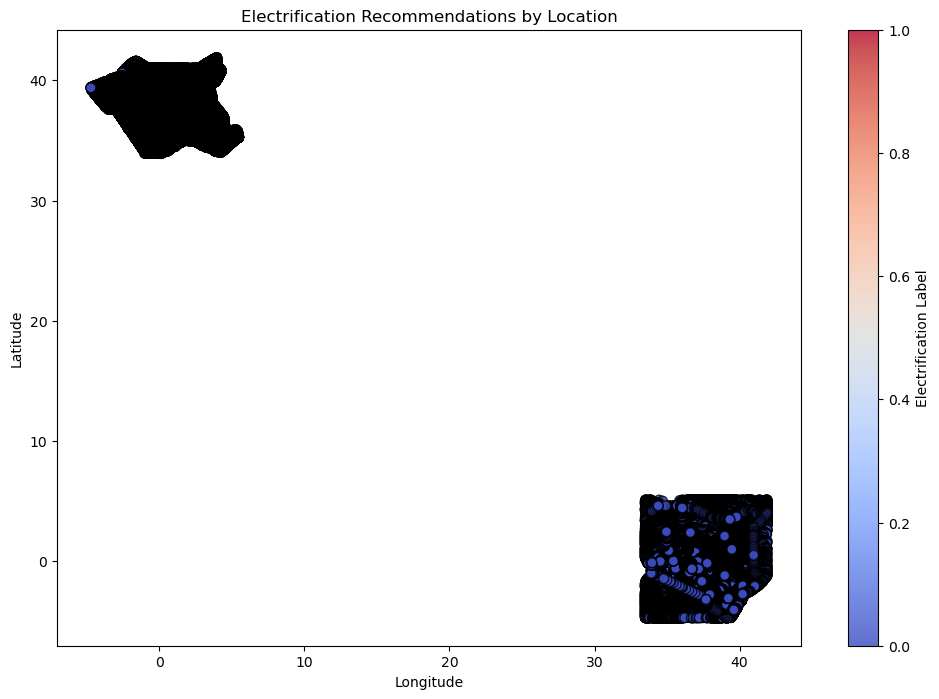

In [141]:

# Create a scatter plot
plt.figure(figsize=(12, 8))
scatter = plt.scatter(
    hdbscan_df['Longitude'], hdbscan_df['Latitude'],
    c=hdbscan_df['Electrification_Label'], cmap='coolwarm', s=50, alpha=0.8, edgecolor='k'
)
plt.colorbar(scatter, label='Electrification Label')
plt.title('Electrification Recommendations by Location')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


### Save Models


In [142]:
# Save the MLP model
model.save("models/mlp_model.h5")


In [143]:

import joblib

import json

# Save the scaler
scaler_filename = "models/scaler.pkl"
joblib.dump(scaler, scaler_filename)

# Save the label encoder
label_encoder_filename = "models/label_encoder.pkl"
joblib.dump(label_encoder, label_encoder_filename)

# Save the HDBSCAN model
hdbscan_filename = "models/hdbscan_model.pkl"
joblib.dump(hdbscan_clusterer, hdbscan_filename)

joblib.dump(income_encoder, 'models/income_encoder.pkl')
joblib.dump(grid_encoder, 'models/grid_encoder.pkl')
joblib.dump(kmeans, 'models/kmeans_model.pkl')


# Save feature names and PCA parameters
metadata = {
    "features": numeric_features,
    "pca_components": 2
}
with open("metadata.json", "w") as f:
    json.dump(metadata, f)


**END**